# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import csv file
baseball=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\baseball.csv")
baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
baseball.shape

(30, 17)

here we have only 30 rows and 17 columns

In [4]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Describe method give stastical analysis of dataframe, it give analysis of numerical columns only, which include, total count, standard deviation, minimum and maximum value of each feature,as well as 25% ,50% and 75% represents first quartile,second quartile and third quartile of dataset

In [5]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


we have total 16 columns ,out of 14 columns, 1 columns are float datatype, 13 columns are integer data type in our dataset, column 'W',is label or taget variable which is cotinous data type,So our problem is Regression type

In [6]:
baseball['CG'].value_counts()

1     7
7     4
2     4
6     3
5     3
3     3
0     3
4     2
11    1
Name: CG, dtype: int64

<AxesSubplot:xlabel='CG', ylabel='count'>

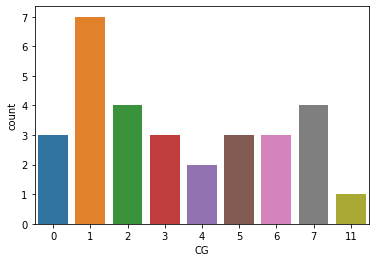

In [7]:
sns.countplot(baseball['CG'])

In [8]:
baseball['SHO'].value_counts()

12    7
10    5
13    3
21    2
15    2
9     2
8     2
7     2
4     2
18    1
14    1
6     1
Name: SHO, dtype: int64

<AxesSubplot:xlabel='SHO', ylabel='count'>

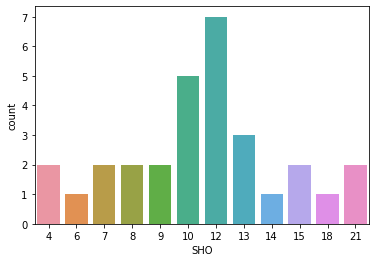

In [9]:
sns.countplot(baseball['SHO'])

In [10]:
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Bivariate Analysis

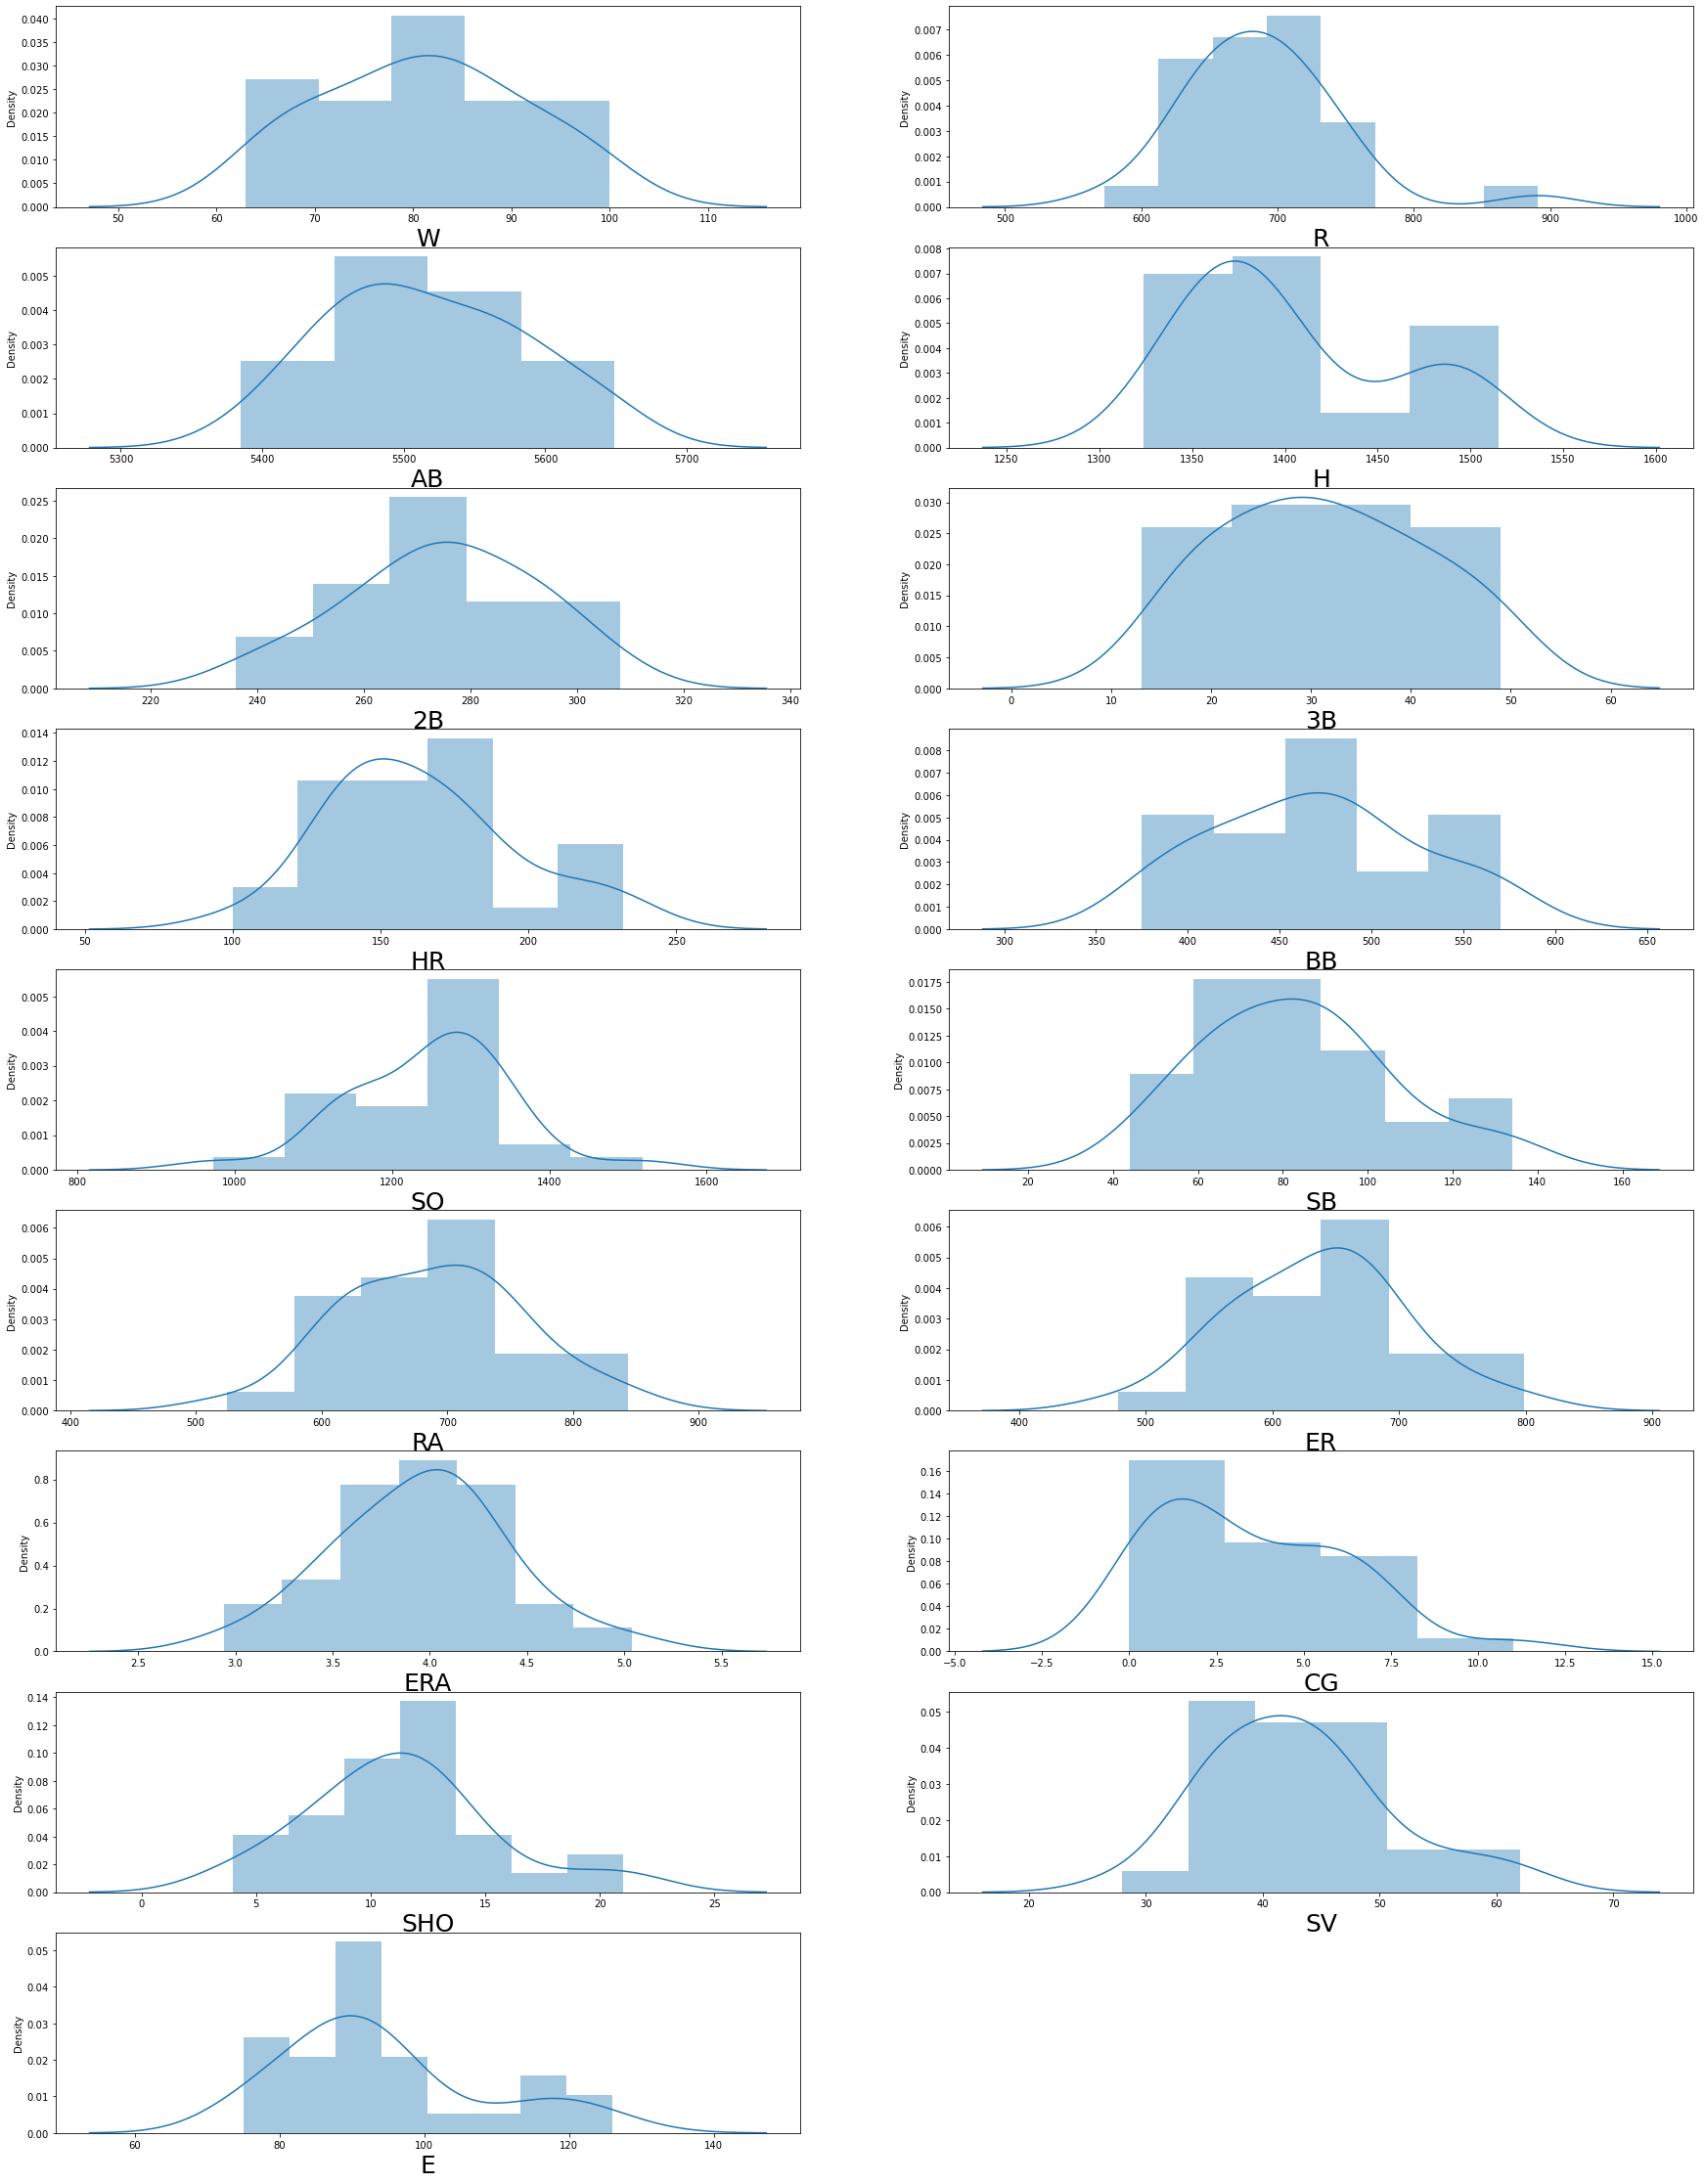

In [11]:
plt.figure(figsize=(30,40))
plotnumber=1
for column in baseball:
    if plotnumber<=18:
        plt.subplot(9,2,plotnumber)
        sns.distplot(baseball[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()
    

From above Distribution plot, we can see that, most of the features contains right skewed data, some contains left skewness

# Bivariate Analysis-Histogram

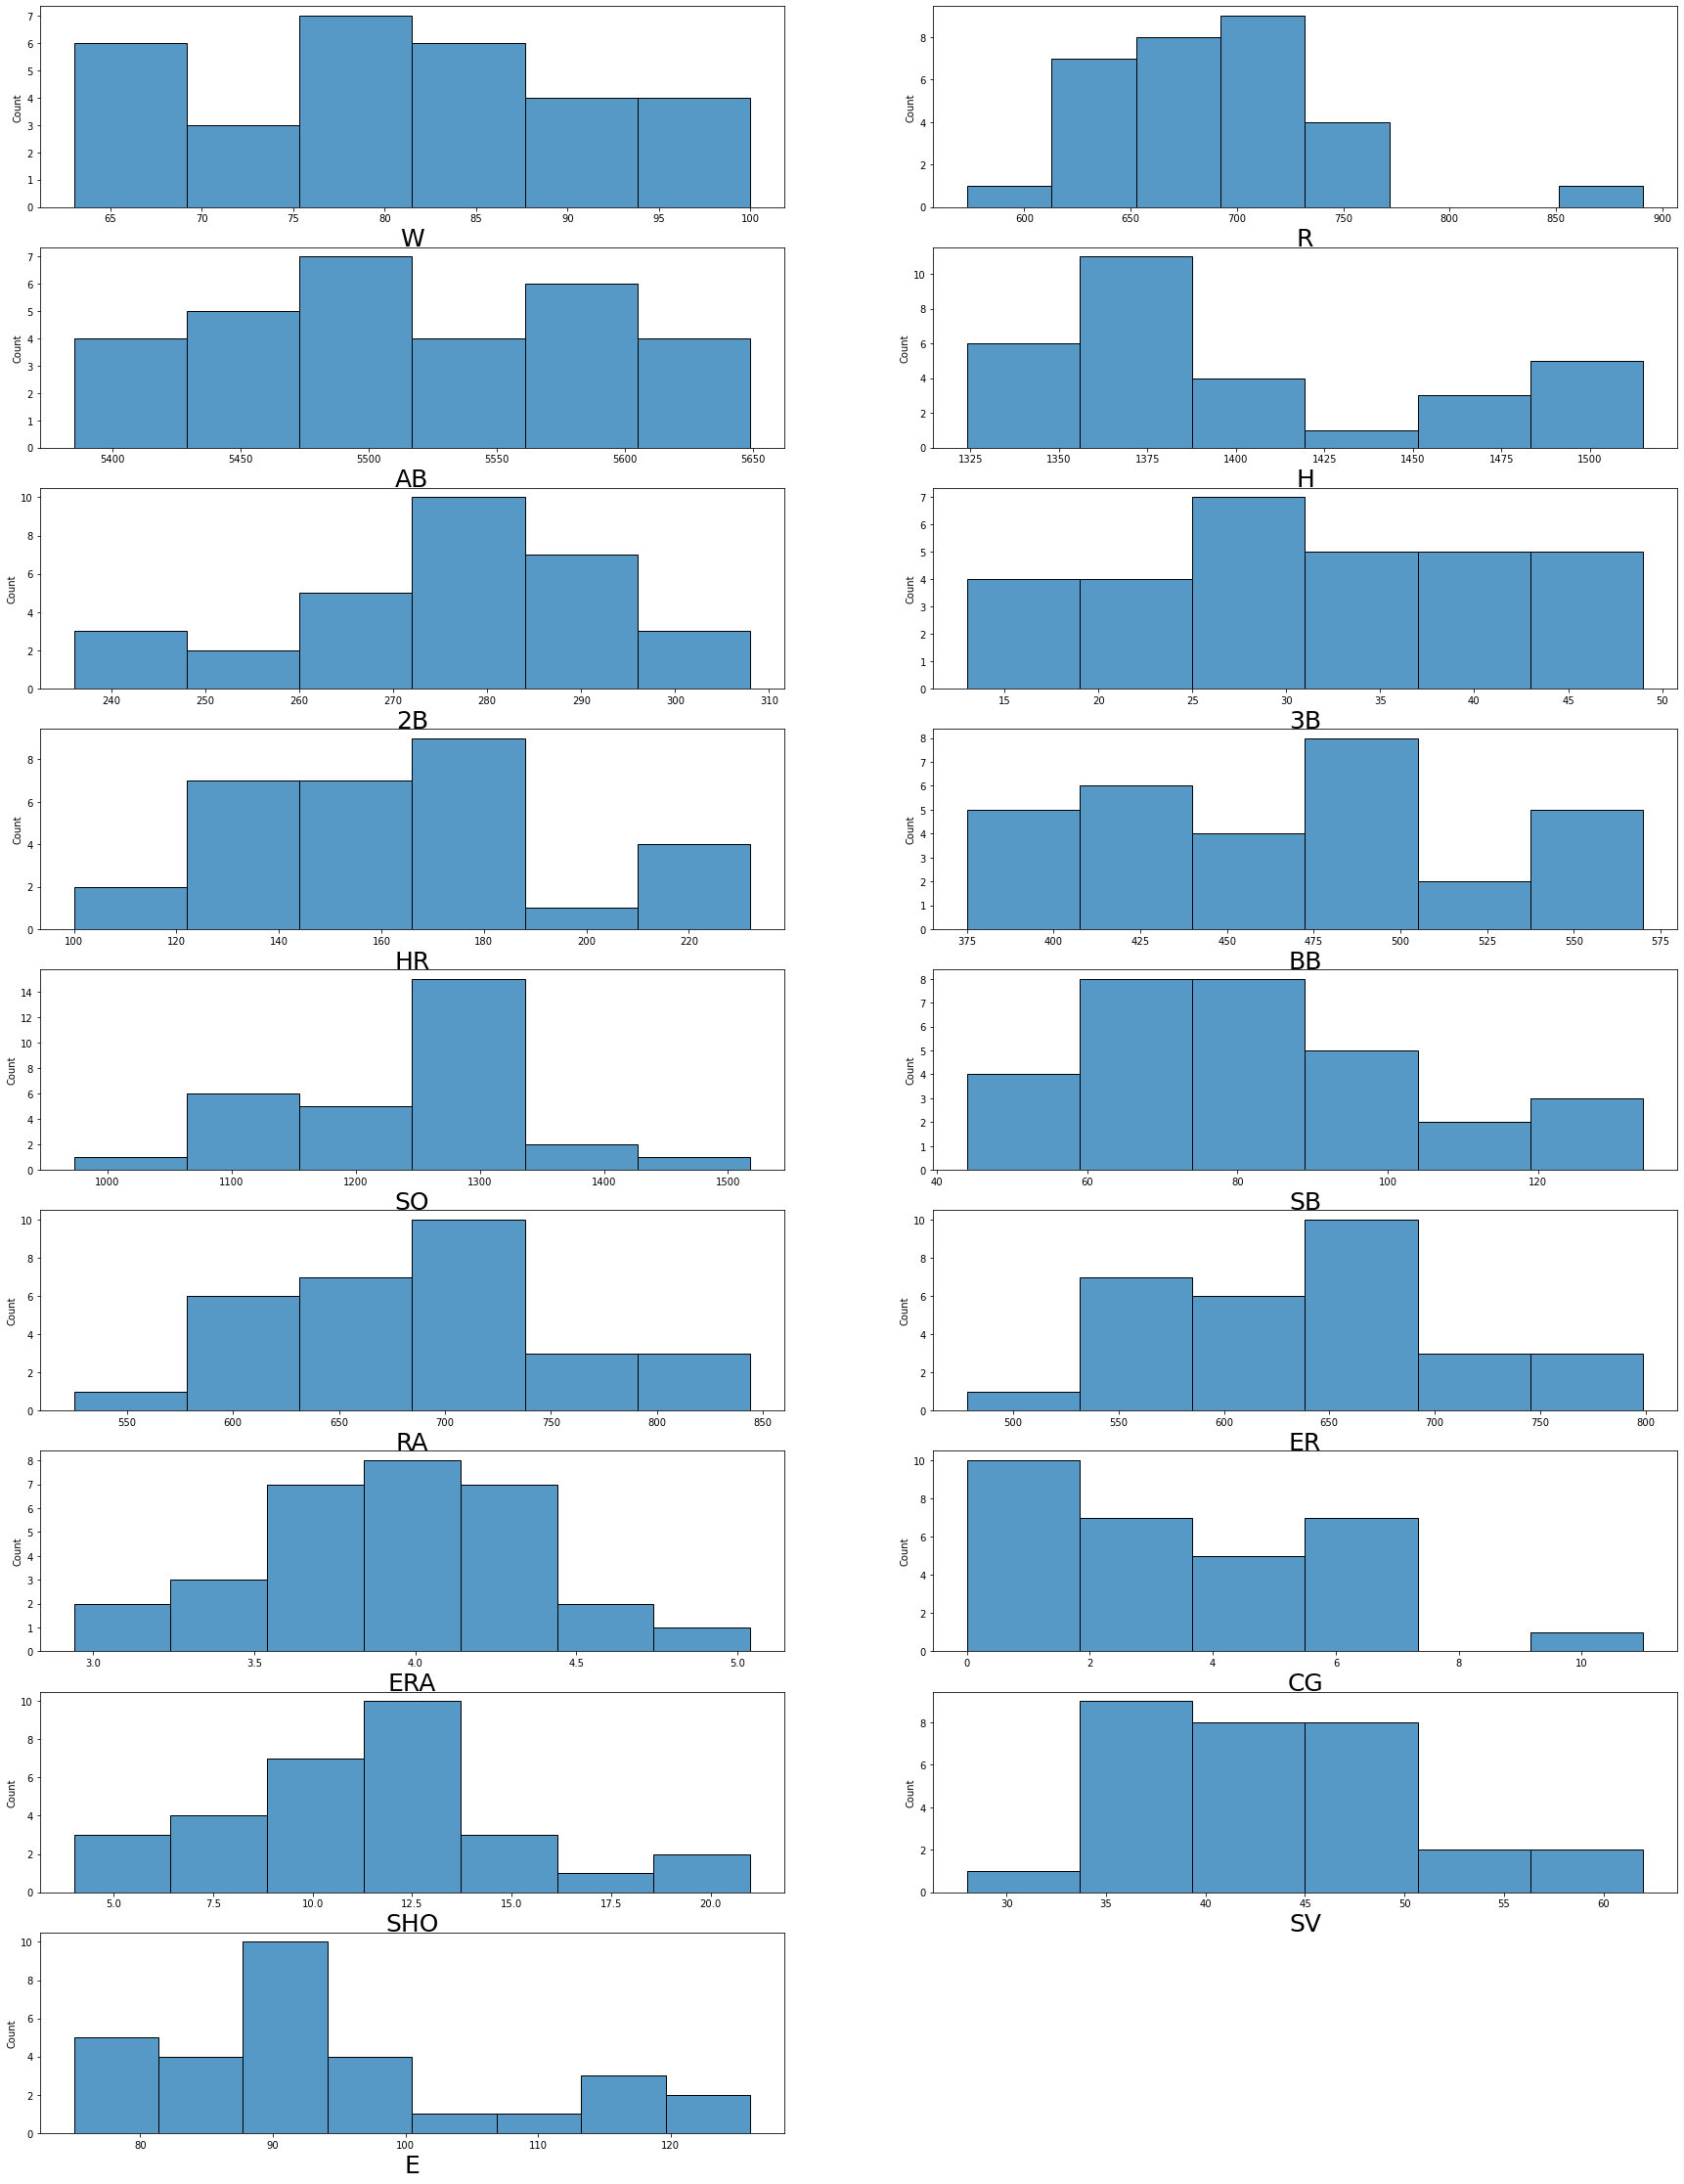

In [12]:
plt.figure(figsize=(30,40))
plotnumber=1
for column in baseball:
    if plotnumber<=18:
        plt.subplot(9,2,plotnumber)
        sns.histplot(baseball[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

Text(0.5, 1.0, 'AB vs W')

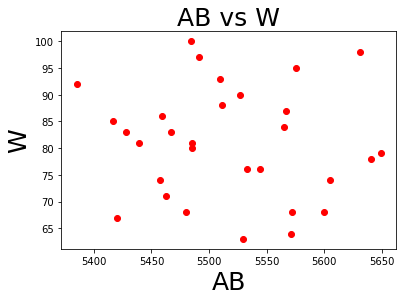

In [13]:
plt.scatter(baseball['AB'],baseball['W'],color='r')
plt.xlabel('AB',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("AB vs W",fontsize=25)

Here we can see that, no linear relationship between 'AB' and "W"

Text(0.5, 1.0, 'R vs W')

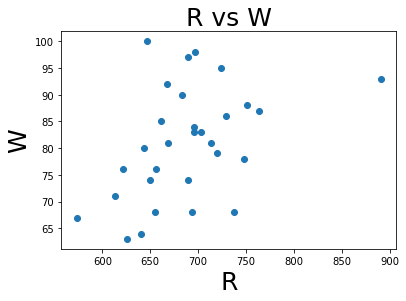

In [14]:
plt.scatter(baseball['R'],baseball['W'])
plt.xlabel('R',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("R vs W",fontsize=25)

Most of datapoint lies upto 750,only one point above 900

Text(0.5, 1.0, 'H vs W')

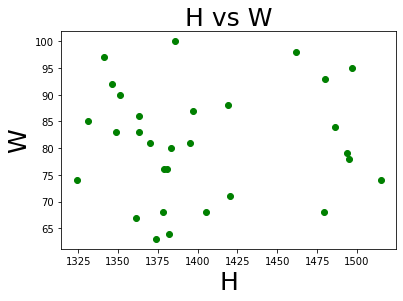

In [15]:
plt.scatter(baseball['H'],baseball['W'],color='g')
plt.xlabel('H',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("H vs W",fontsize=25)

There is no perfect relationship between 'H' and "W"

Text(0.5, 1.0, '2B vs W')

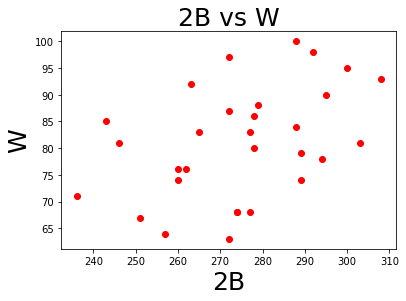

In [16]:
plt.scatter(baseball['2B'],baseball['W'],color='r')
plt.xlabel('2B',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("2B vs W",fontsize=25)

Some linear relationship between '2B' and 'W' but not perfect

Text(0.5, 1.0, '3B vs W')

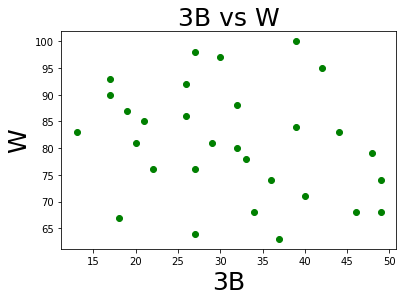

In [17]:
plt.scatter(baseball['3B'],baseball['W'],color='g')
plt.xlabel('3B',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("3B vs W",fontsize=25)

Some  non linear relationship between '3B' and 'W' but not perfect

Text(0.5, 1.0, 'HR vs W')

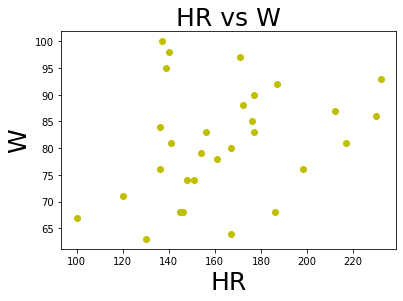

In [18]:
plt.scatter(baseball['HR'],baseball['W'],color='y')
plt.xlabel('HR',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("HR vs W",fontsize=25)

Some  linear relationship between 'HR' and 'W' but not perfect

Text(0.5, 1.0, 'BB vs W')

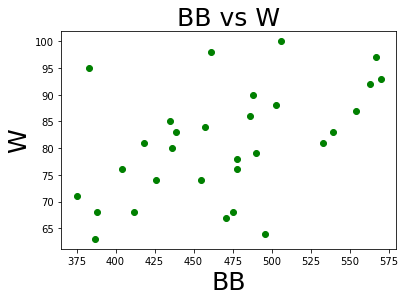

In [19]:
plt.scatter(baseball['BB'],baseball['W'],color='g')
plt.xlabel('BB',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("BB vs W",fontsize=25)

some linear relationship between 'BB' and 'W' but not perfect

Text(0.5, 1.0, 'SO vs W')

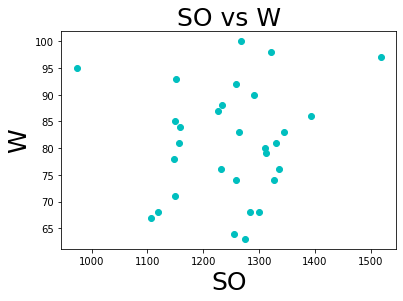

In [20]:
plt.scatter(baseball['SO'],baseball['W'],color='c')
plt.xlabel('SO',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("SO vs W",fontsize=25)

There is no perfect relationship between 'SO'and "W"

Text(0.5, 1.0, 'SB vs W')

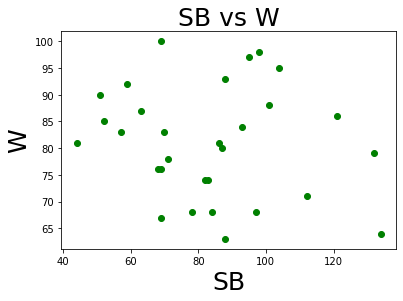

In [21]:
plt.scatter(baseball['SB'],baseball['W'],color='g')
plt.xlabel('SB',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("SB vs W",fontsize=25)

There is no perfect relationship between 'SB'and "W"

Text(0.5, 1.0, 'RA vs W')

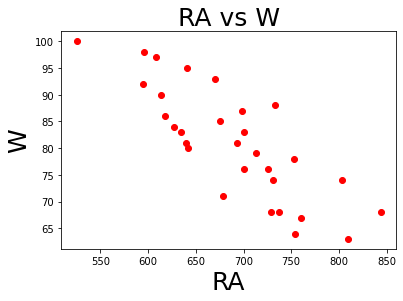

In [22]:
plt.scatter(baseball['RA'],baseball['W'],color='r')
plt.xlabel('RA',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("RA vs W",fontsize=25)

This graph shows Non linear relationship between 'RA' and "W"

Text(0.5, 1.0, 'ER vs W')

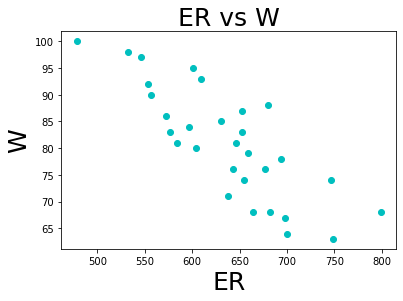

In [23]:
plt.scatter(baseball['ER'],baseball['W'],color='c')
plt.xlabel('ER',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("ER vs W",fontsize=25)

This graph shows Non linear relationship between 'ER' and "W"

Text(0.5, 1.0, 'ERA vs W')

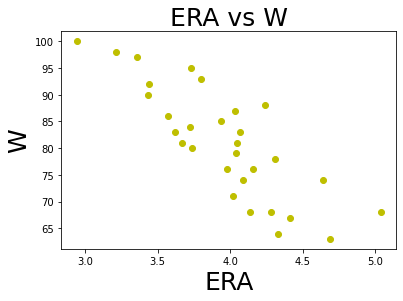

In [24]:
plt.scatter(baseball['ERA'],baseball['W'],color='y')
plt.xlabel('ERA',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("ERA vs W",fontsize=25)

This graph shows Non linear relationship between 'ERA' and "W"

Text(0.5, 1.0, 'CG vs W')

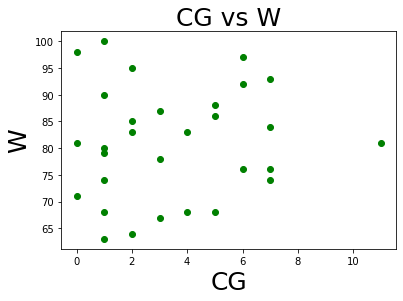

In [25]:
plt.scatter(baseball['CG'],baseball['W'],color='g')
plt.xlabel('CG',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("CG vs W",fontsize=25)

This graph shows No relationship between 'CG' and "W"

Text(0.5, 1.0, 'SHO vs W')

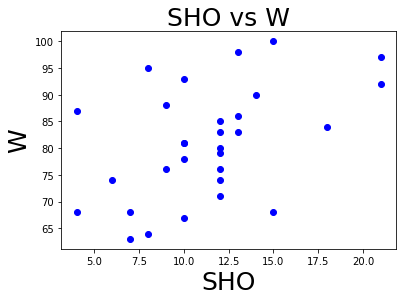

In [26]:
plt.scatter(baseball['SHO'],baseball['W'],color='b')
plt.xlabel('SHO',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("SHO vs W",fontsize=25)

This graph shows No relationship between 'SHO' and "W"

Text(0.5, 1.0, 'SV vs W')

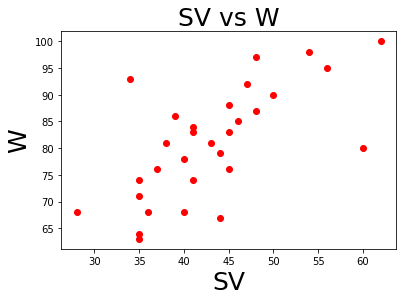

In [27]:
plt.scatter(baseball['SV'],baseball['W'],color='r')
plt.xlabel('SV',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("SV vs W",fontsize=25)

This graph  linear relationship between 'SV' and "W"

Text(0.5, 1.0, 'E vs W')

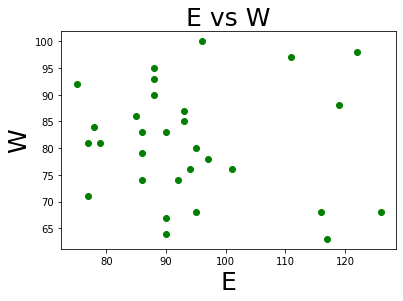

In [28]:
plt.scatter(baseball['E'],baseball['W'],color='g')
plt.xlabel('E',fontsize=25)
plt.ylabel('W',fontsize=25)
plt.title("E vs W",fontsize=25)

This graph shows No relationship between 'E' and "W"

W         AxesSubplot(0.125,0.749828;0.133621x0.130172)
R      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
AB      AxesSubplot(0.44569,0.749828;0.133621x0.130172)
H      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
2B     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
3B        AxesSubplot(0.125,0.593621;0.133621x0.130172)
HR     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
BB      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
SO     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
SB     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
RA        AxesSubplot(0.125,0.437414;0.133621x0.130172)
ER     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
ERA     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
CG     AxesSubplot(0.606034,0.437414;0.133621x0.130172)
SHO    AxesSubplot(0.766379,0.437414;0.133621x0.130172)
SV        AxesSubplot(0.125,0.281207;0.133621x0.130172)
E      AxesSubplot(0.285345,0.281207;0.133621x0.130172)
dtype: object

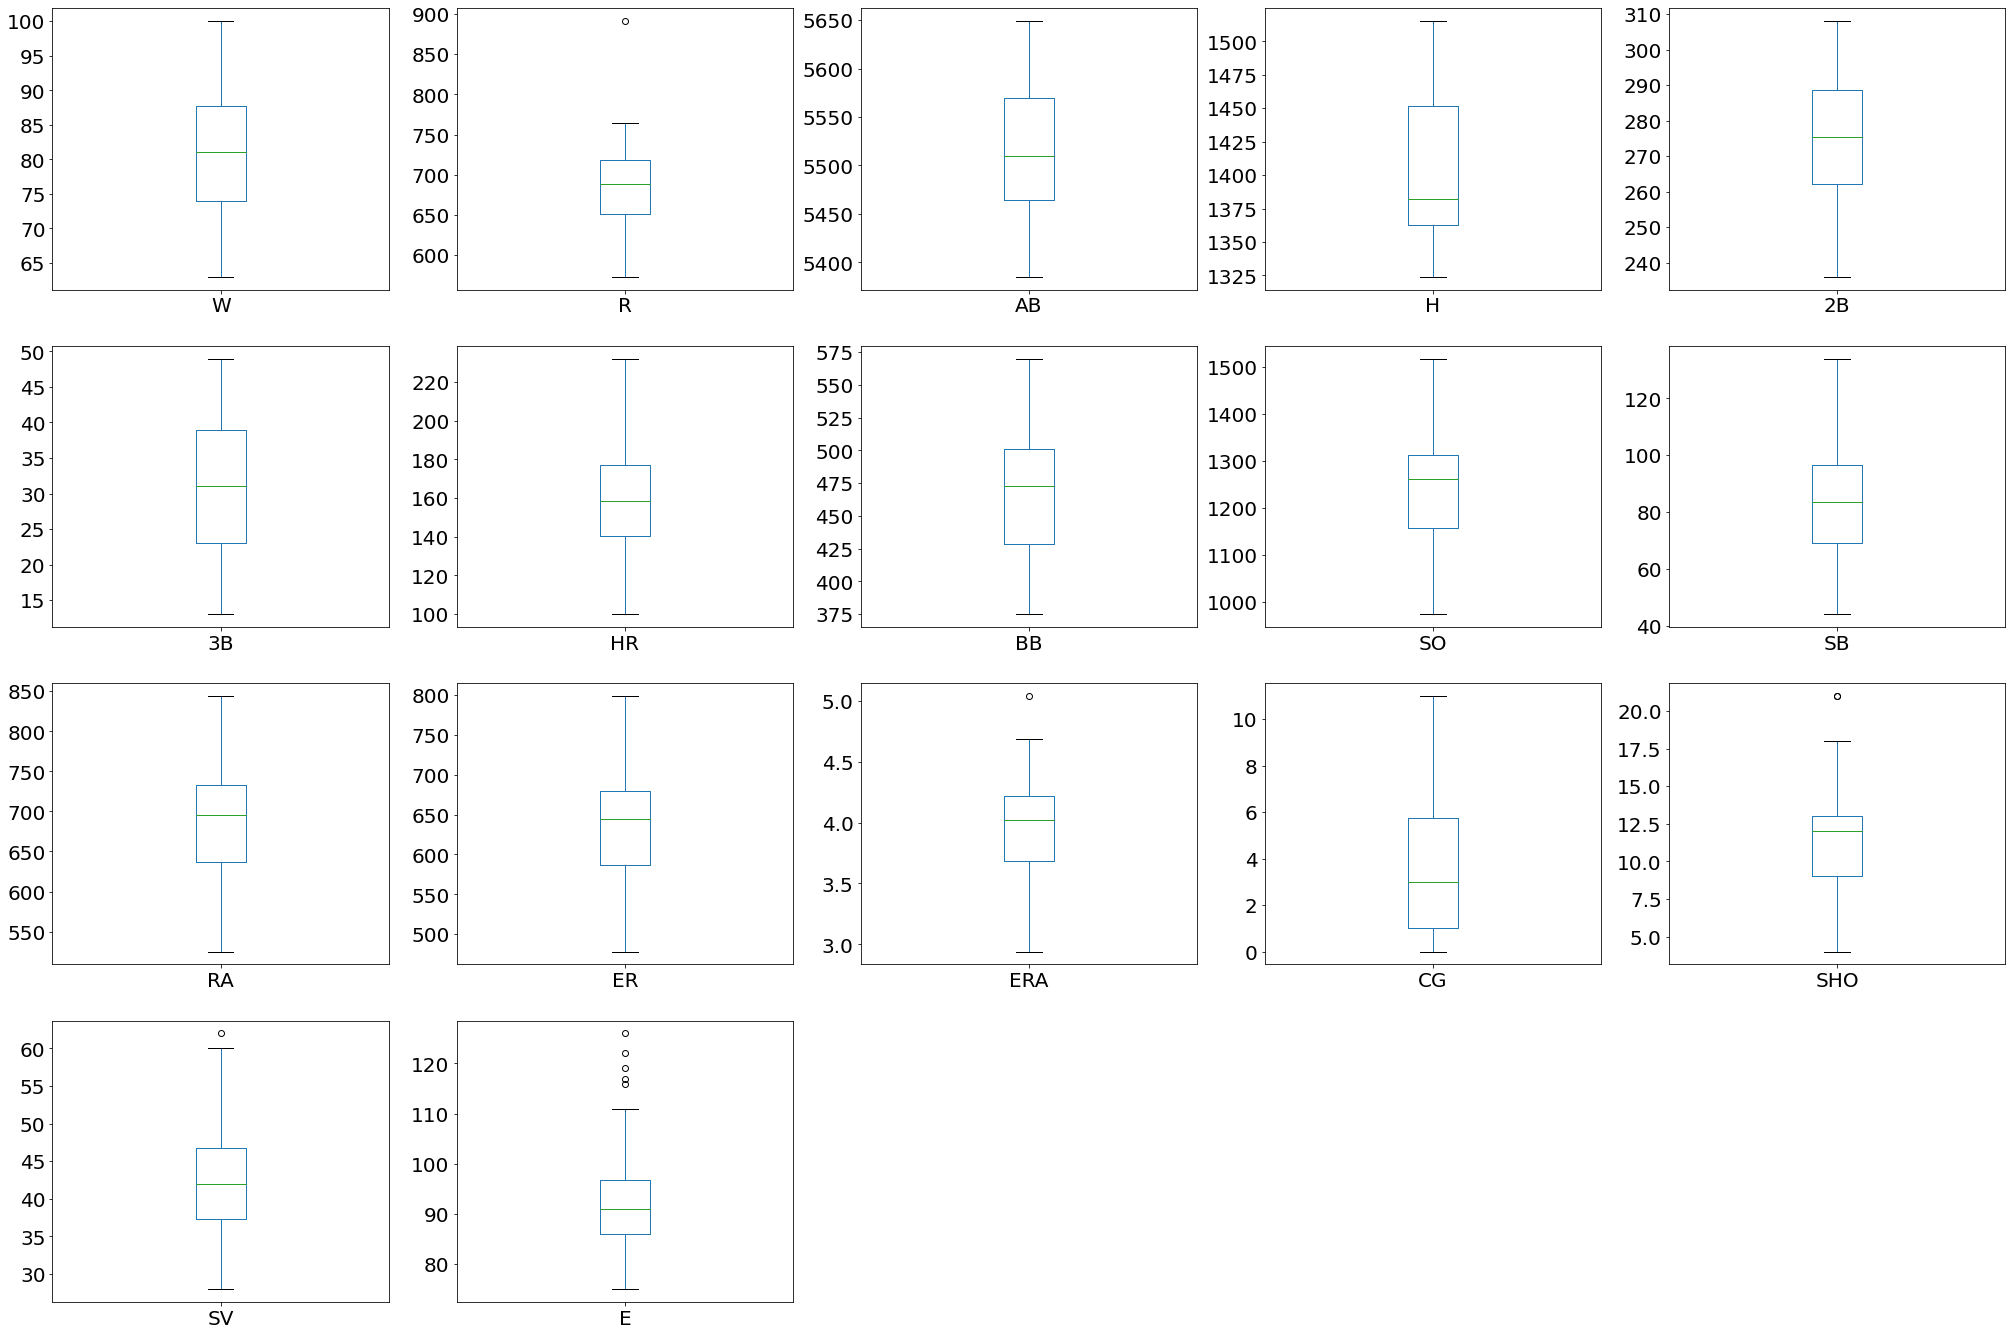

In [29]:
baseball.plot(kind="box",subplots=True,figsize=(35,30),layout=(5,5),fontsize=20)

We can placed z score on normal distribution curve ranges from -3 standard deviation to the left of normal distribution curve to +3 S.D to right of normal distribution ,there we select z<3,and with value it cover almost 97.72 area of Distribution

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(baseball))
print(z)

[[1.36540860e+00 6.19077968e-01 8.47731264e-01 1.66368512e+00
  1.42017307e+00 1.04119304e+00 7.87298598e-01 1.53490242e+00
  2.69762957e+00 9.13883291e-01 6.66233927e-01 5.05110079e-01
  5.06955186e-01 5.39806195e-01 8.14628593e-01 1.67160651e+00
  4.61469635e-01]
 [1.97838300e-01 1.34431656e-01 7.11093535e-01 9.70680764e-01
  1.27403389e-01 1.23580856e+00 2.43966683e-01 5.36591904e-01
  1.54878442e-01 6.01825582e-01 1.65970766e-01 2.48929848e-01
  2.54597523e-01 5.39806195e-01 1.72800005e-01 2.49879323e-01
  6.07196888e-01]
 [3.24325082e-03 3.32905860e-01 1.11523330e+00 1.51891367e-01
  1.58879521e+00 2.23807850e-01 7.23377196e-01 1.13914361e+00
  8.93981893e-01 1.11449182e-01 6.80339091e-01 7.51623132e-01
  6.41346840e-01 2.77264091e+00 3.20914294e-01 6.54856158e-01
  1.11724227e+00]
 [4.83244373e-01 1.14641931e+00 2.41521620e-01 4.01088140e-01
  8.28122030e-01 4.18423371e-01 8.83180700e-01 1.16053598e+00
  1.68601848e-01 6.90984928e-01 1.80075931e-01 1.03922169e-01
  5.30100415e-02

In [31]:
threshold=3
print(np.where(z<3))
print(baseball.shape)


(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 1

In [32]:
baseball_1=baseball[(z<3).all(axis=1)]

In [33]:
baseball_1.shape

(29, 17)

we lose 1 rows out of 30, now we have 29 rows, we cant do more reduction

W         AxesSubplot(0.125,0.749828;0.133621x0.130172)
R      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
AB      AxesSubplot(0.44569,0.749828;0.133621x0.130172)
H      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
2B     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
3B        AxesSubplot(0.125,0.593621;0.133621x0.130172)
HR     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
BB      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
SO     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
SB     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
RA        AxesSubplot(0.125,0.437414;0.133621x0.130172)
ER     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
ERA     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
CG     AxesSubplot(0.606034,0.437414;0.133621x0.130172)
SHO    AxesSubplot(0.766379,0.437414;0.133621x0.130172)
SV        AxesSubplot(0.125,0.281207;0.133621x0.130172)
E      AxesSubplot(0.285345,0.281207;0.133621x0.130172)
dtype: object

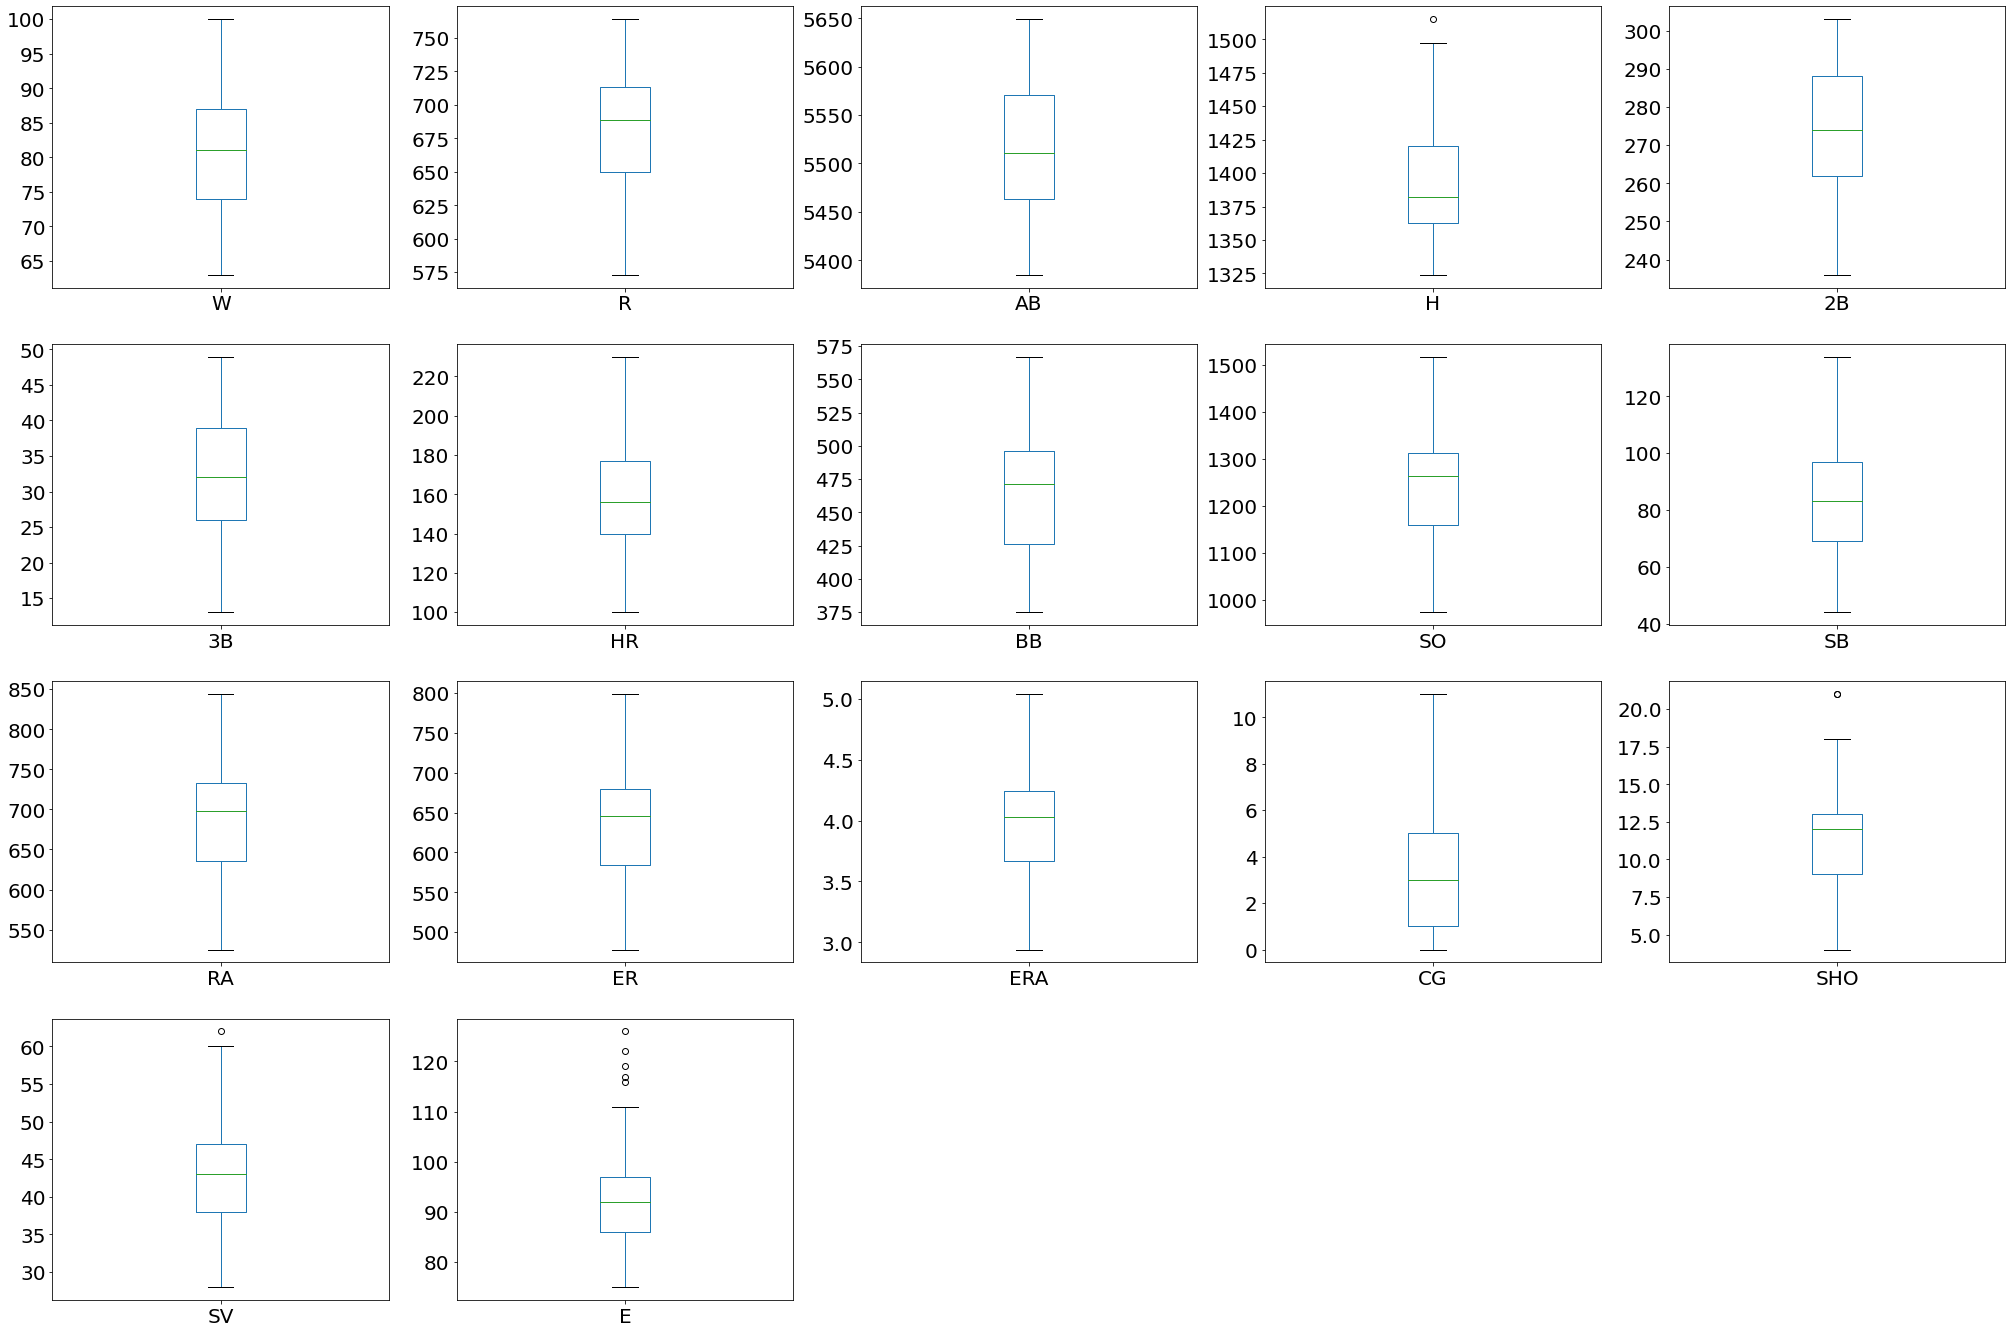

In [34]:
baseball_1.plot(kind="box",subplots=True,figsize=(35,30),layout=(5,5),fontsize=20)

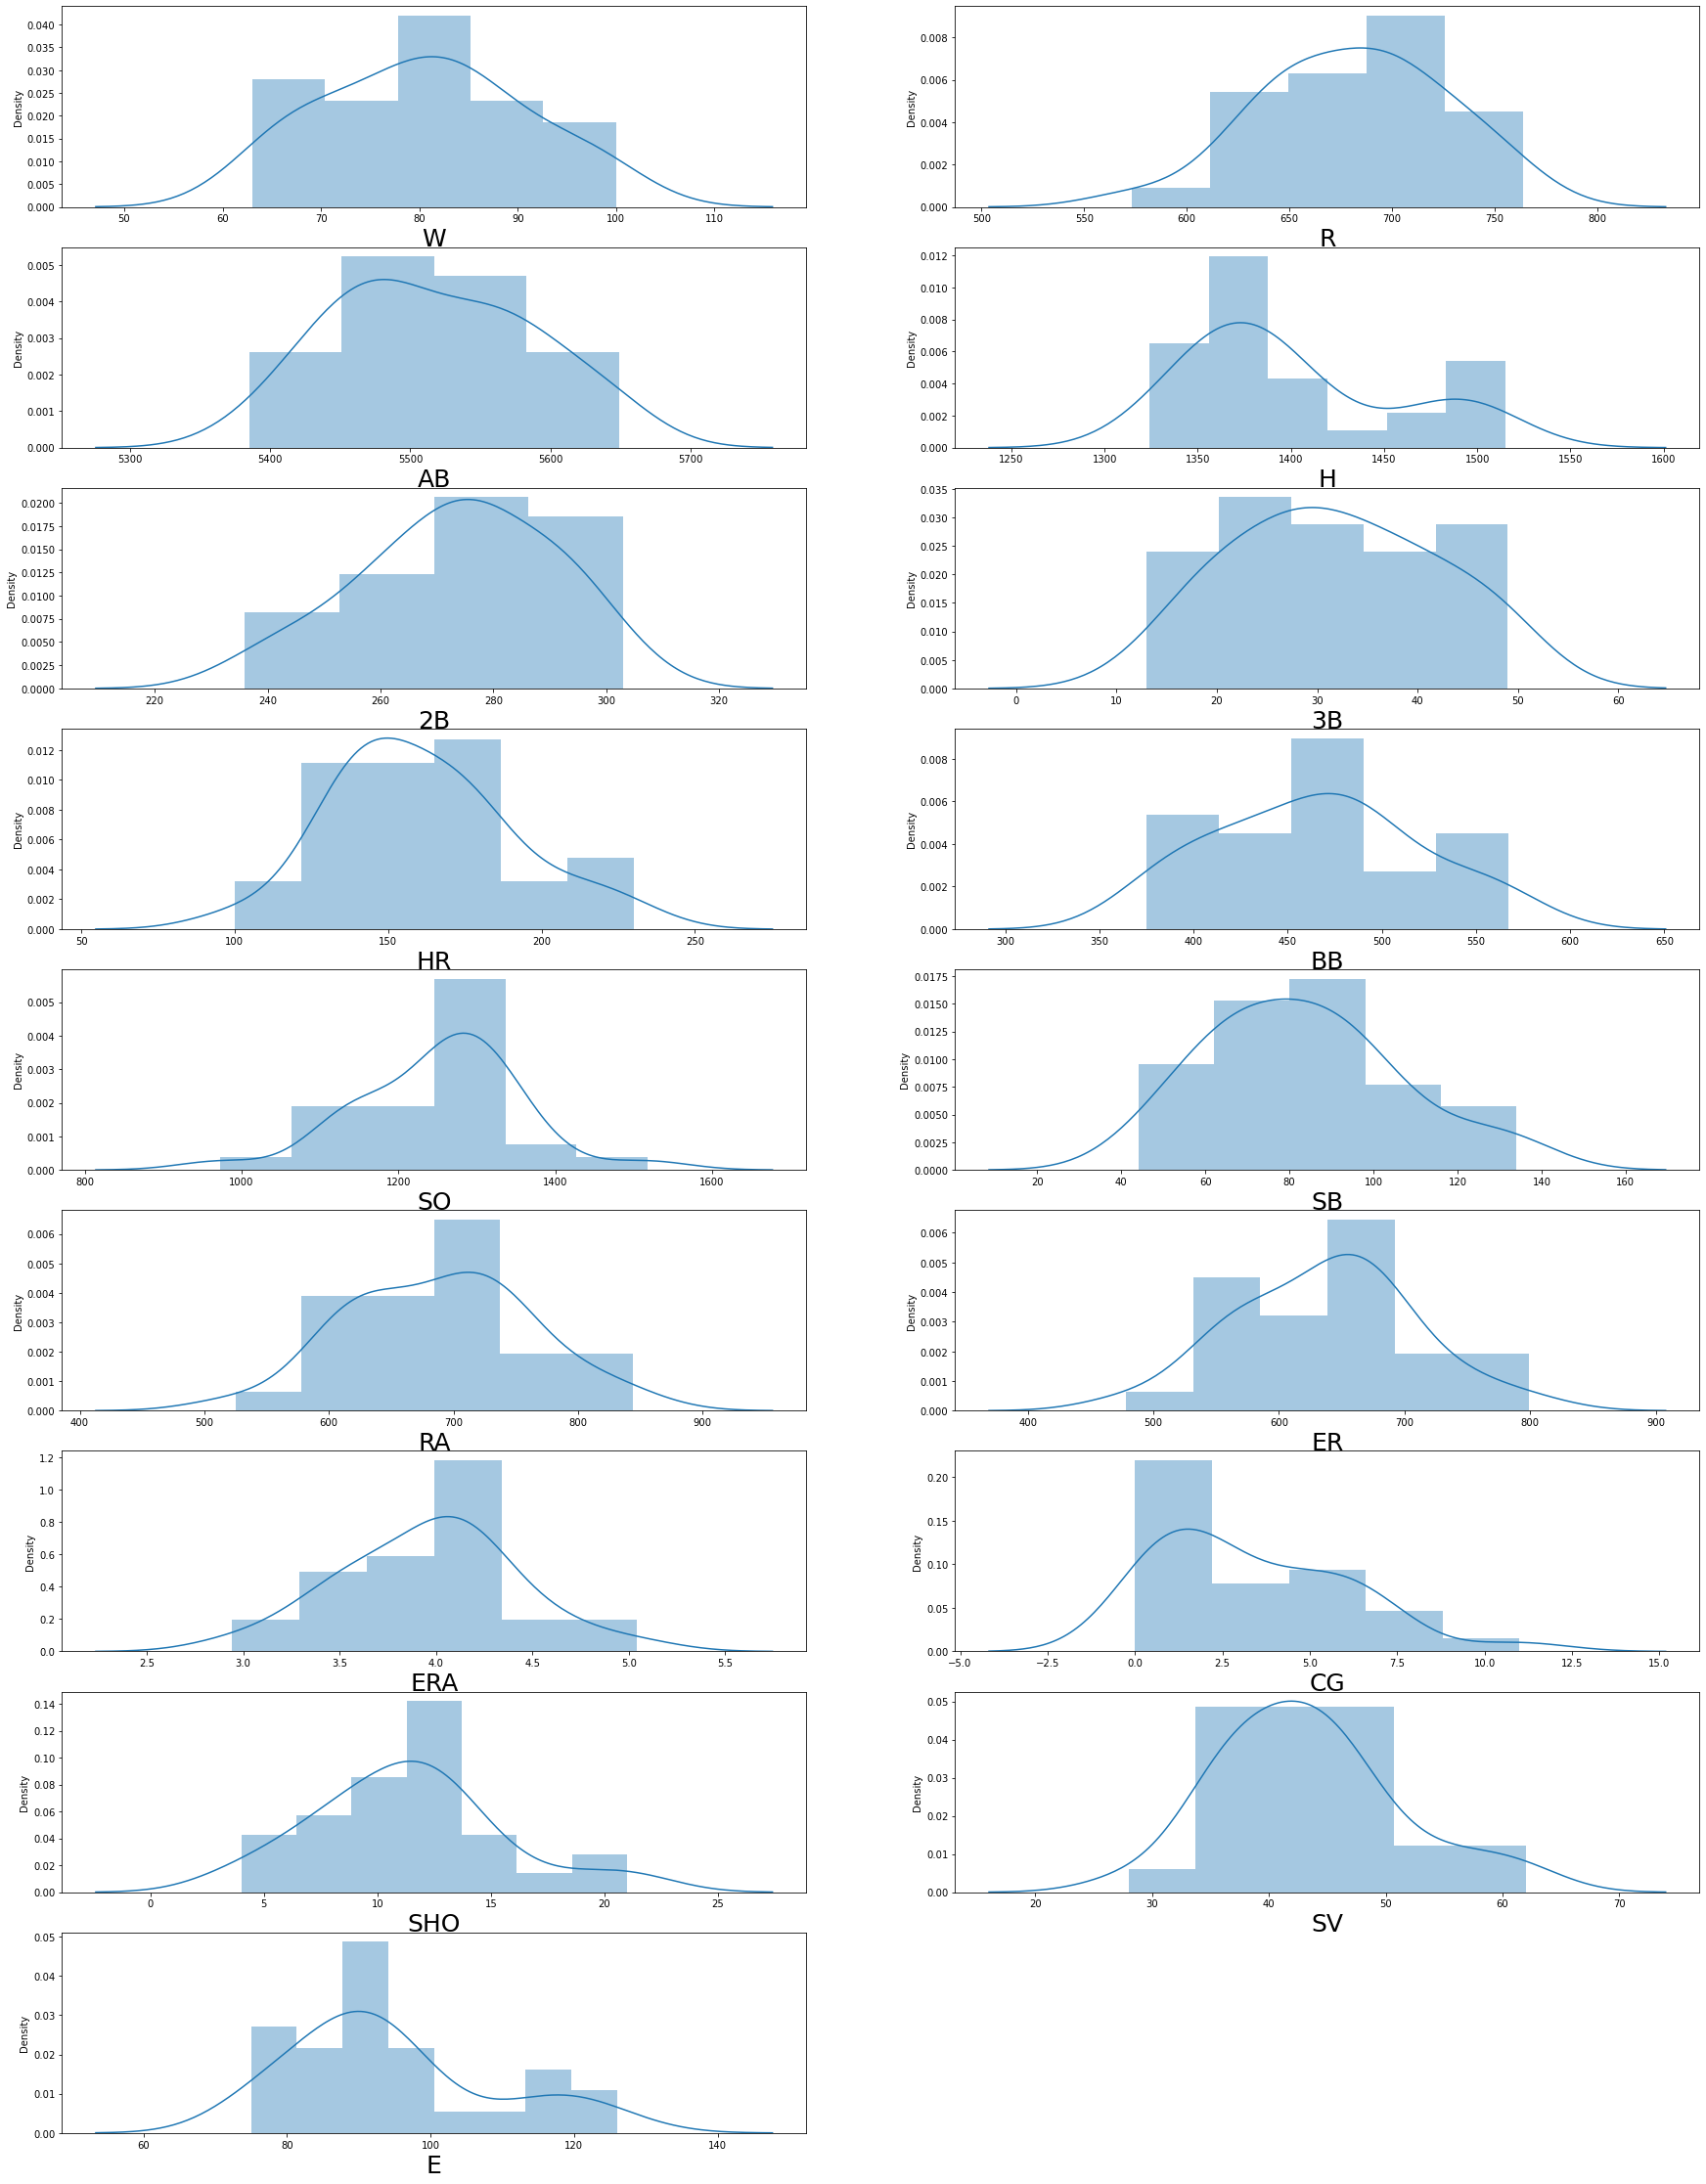

In [35]:
plt.figure(figsize=(30,40))
plotnumber=1
for column in baseball_1:
    if plotnumber<=18:
        plt.subplot(9,2,plotnumber)
        sns.distplot(baseball_1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [36]:
baseball_1=baseball_1.drop(columns=['E'],axis=1)


feature 'E' show too much outliers so we drop it

In [37]:
baseball_1.shape

(29, 16)

In [38]:
baseball_1.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
dtype: int64

Lets check any NaN value is created due to skewness or outlier removal

### Skewness Removal using Log1p transformation beacuse our feature contain Right skewness

In [39]:
c=3 #Add a constant value © to each value of variable
baseball_1['R'] = baseball_1["R"].apply(lambda x: np.log1p(x**c))
baseball_1['AB'] = baseball_1["AB"].apply(lambda x: np.log1p(x**c))
baseball_1['H'] = baseball_1["H"].apply(lambda x: np.log1p(x**c))
baseball_1['2B'] = baseball_1["2B"].apply(lambda x: np.log1p(x**c))
baseball_1['3B'] = baseball_1["3B"].apply(lambda x: np.log1p(x**c))
baseball_1['HR'] = baseball_1["HR"].apply(lambda x: np.log1p(x**c))
baseball_1['BB'] = baseball_1["BB"].apply(lambda x: np.log1p(x**c))
baseball_1['SO'] = baseball_1["SO"].apply(lambda x: np.log1p(x**c))
baseball_1['SB'] = baseball_1["SB"].apply(lambda x: np.log1p(x**c))
baseball_1['RA'] = baseball_1["RA"].apply(lambda x: np.log1p(x**c))
baseball_1['ER'] = baseball_1["ER"].apply(lambda x: np.log1p(x**c))
baseball_1['ERA'] = baseball_1["ERA"].apply(lambda x: np.log1p(x**c))
baseball_1['CG'] = baseball_1["CG"].apply(lambda x: np.log1p(x**c))
baseball_1['SHO'] = baseball_1["SHO"].apply(lambda x: np.log1p(x**c))
baseball_1['SV'] = baseball_1["SV"].apply(lambda x: np.log1p(x**c))
#baseball_1['E'] = baseball_1["E"].apply(lambda x: np.log(x**c))

In [40]:
from scipy.stats import norm,skew

<AxesSubplot:xlabel='R', ylabel='Density'>

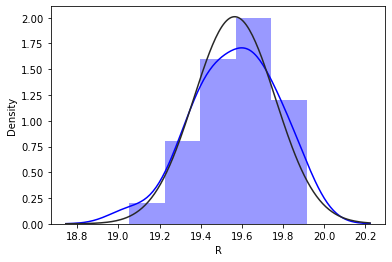

In [41]:
sns.distplot(baseball_1['R'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='AB', ylabel='Density'>

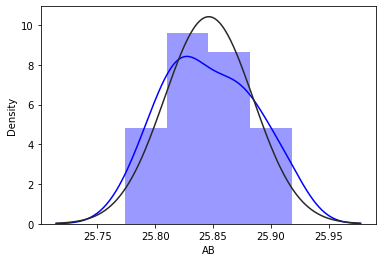

In [42]:
sns.distplot(baseball_1['AB'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='H', ylabel='Density'>

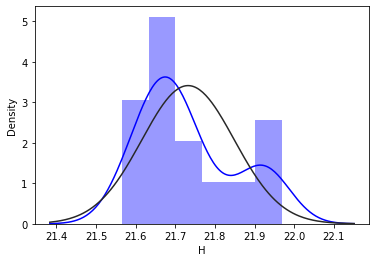

In [43]:
sns.distplot(baseball_1['H'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='2B', ylabel='Density'>

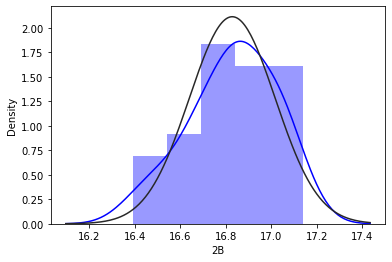

In [44]:
sns.distplot(baseball_1['2B'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='3B', ylabel='Density'>

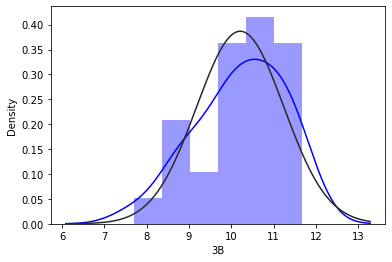

In [45]:
sns.distplot(baseball_1['3B'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='HR', ylabel='Density'>

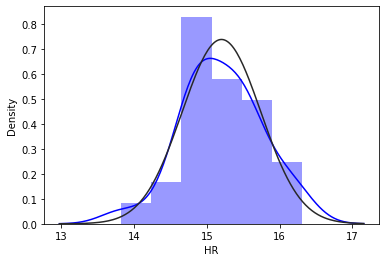

In [46]:
sns.distplot(baseball_1['HR'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='BB', ylabel='Density'>

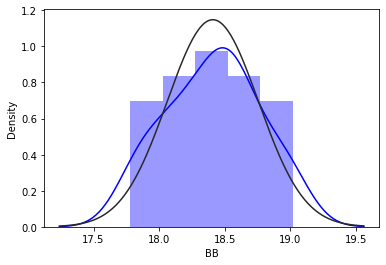

In [47]:
sns.distplot(baseball_1['BB'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='SO', ylabel='Density'>

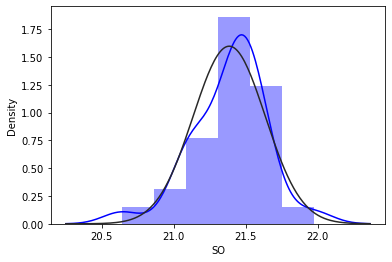

In [48]:
sns.distplot(baseball_1['SO'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='SB', ylabel='Density'>

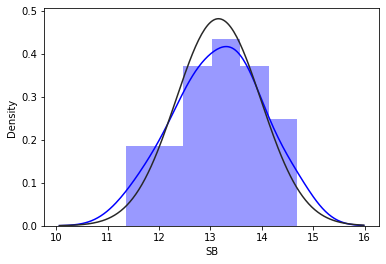

In [49]:
sns.distplot(baseball_1['SB'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='RA', ylabel='Density'>

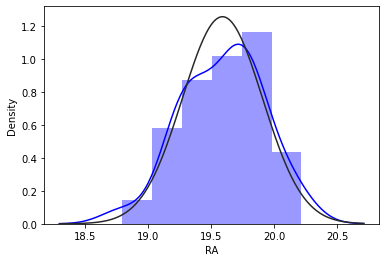

In [50]:
sns.distplot(baseball_1['RA'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='ER', ylabel='Density'>

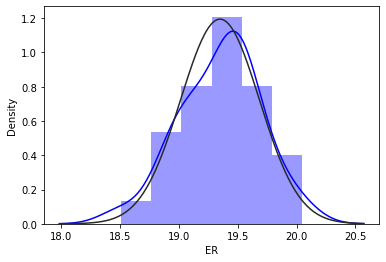

In [51]:
sns.distplot(baseball_1['ER'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='ERA', ylabel='Density'>

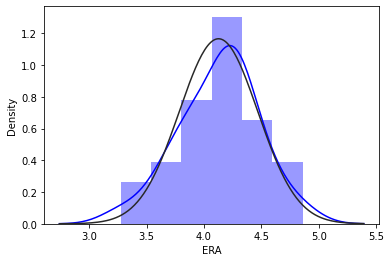

In [52]:
sns.distplot(baseball_1['ERA'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='CG', ylabel='Density'>

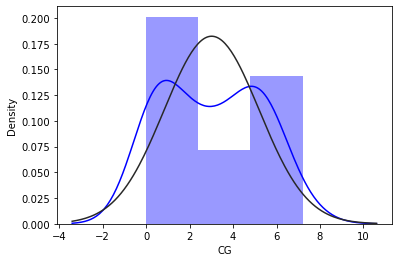

In [53]:
sns.distplot(baseball_1['CG'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='SHO', ylabel='Density'>

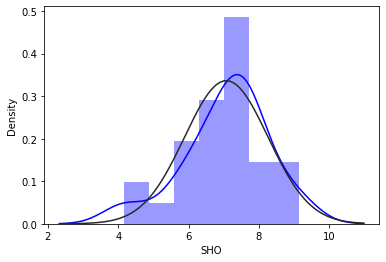

In [54]:
sns.distplot(baseball_1['SHO'],fit=norm,kde=True,color='blue')

<AxesSubplot:xlabel='SV', ylabel='Density'>

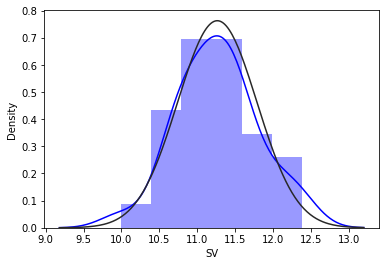

In [55]:
sns.distplot(baseball_1['SV'],fit=norm,kde=True,color='blue')

In [56]:
 baseball_1.shape

(29, 16)

In [57]:
baseball_1.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
dtype: int64

W         AxesSubplot(0.125,0.749828;0.133621x0.130172)
R      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
AB      AxesSubplot(0.44569,0.749828;0.133621x0.130172)
H      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
2B     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
3B        AxesSubplot(0.125,0.593621;0.133621x0.130172)
HR     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
BB      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
SO     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
SB     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
RA        AxesSubplot(0.125,0.437414;0.133621x0.130172)
ER     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
ERA     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
CG     AxesSubplot(0.606034,0.437414;0.133621x0.130172)
SHO    AxesSubplot(0.766379,0.437414;0.133621x0.130172)
SV        AxesSubplot(0.125,0.281207;0.133621x0.130172)
dtype: object

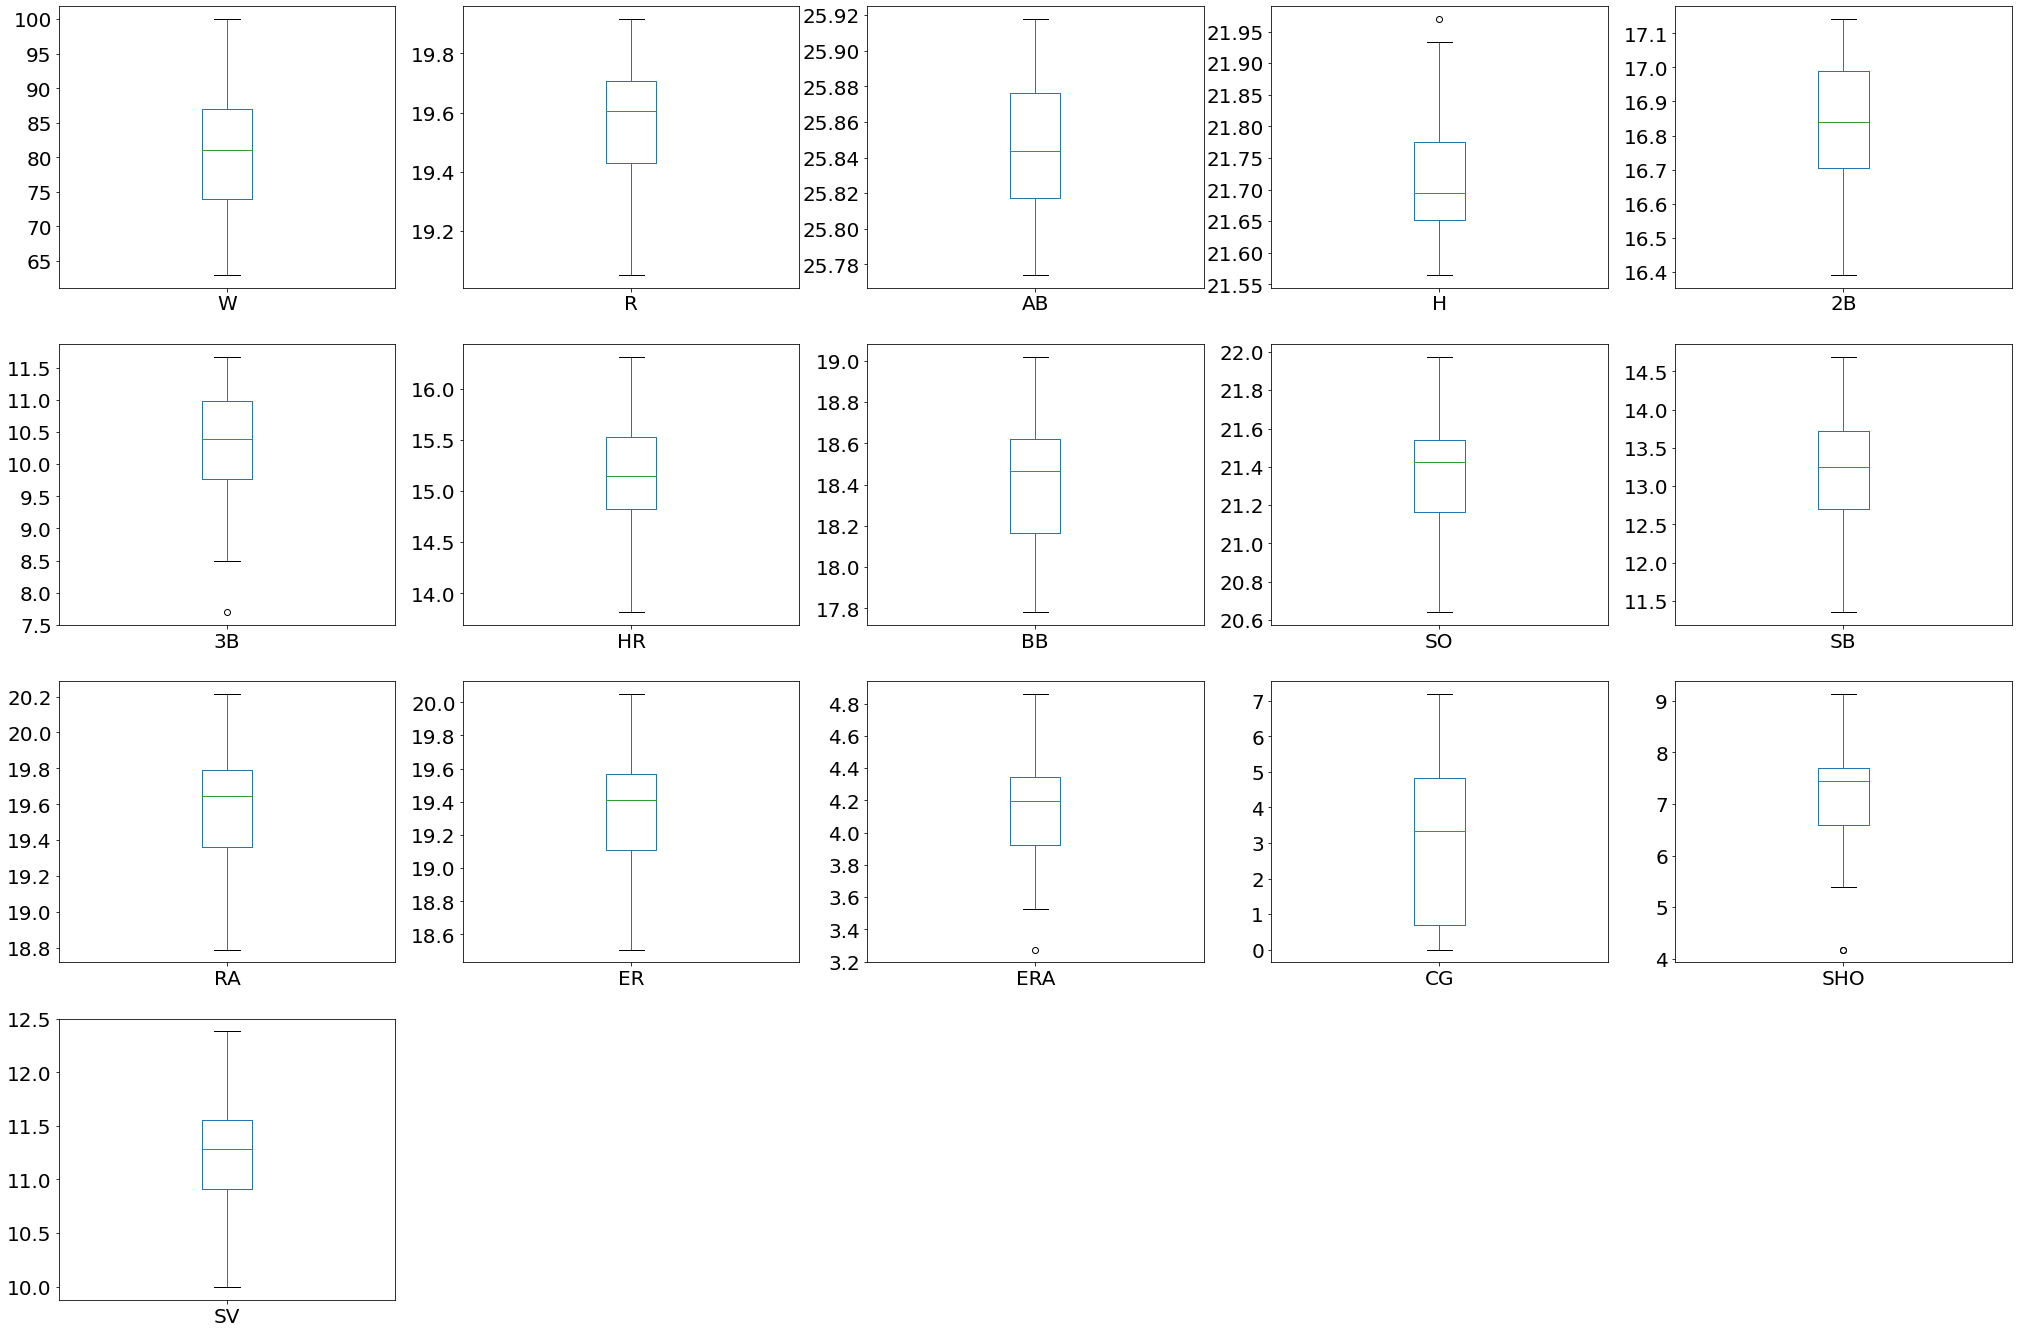

In [58]:
baseball_1.plot(kind="box",subplots=True,figsize=(35,30),layout=(5,5),fontsize=20)

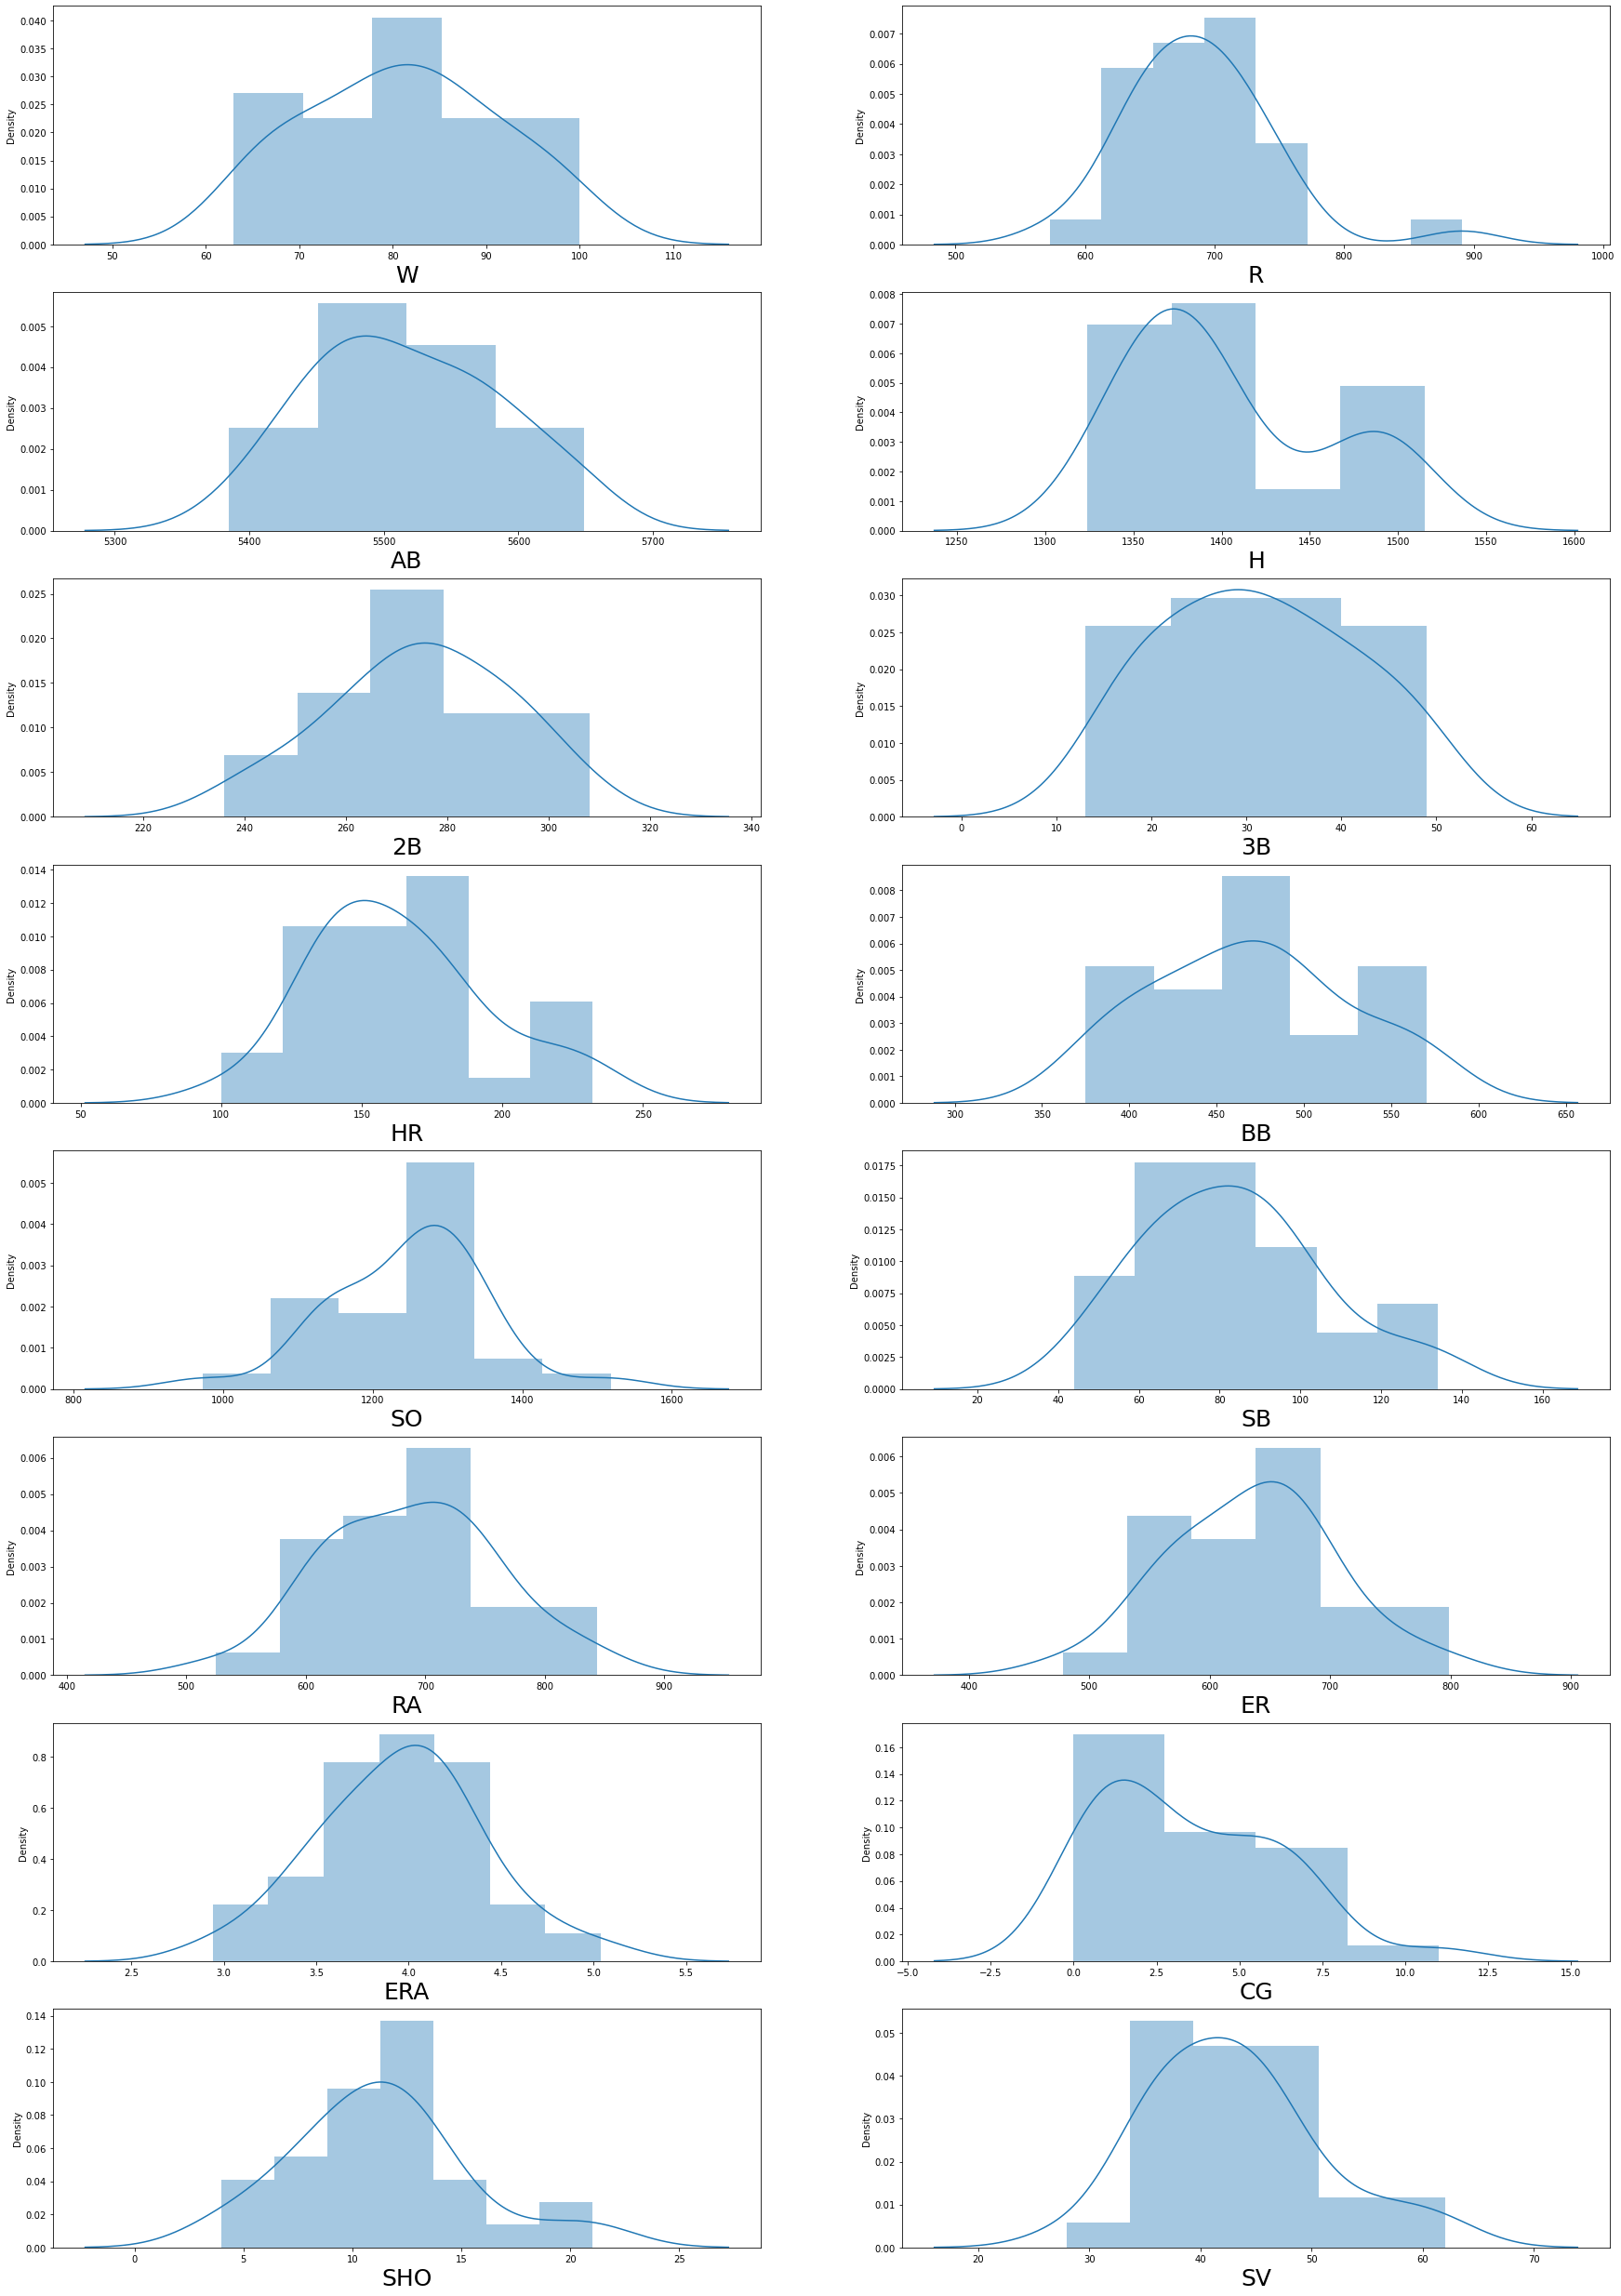

In [59]:
plt.figure(figsize=(30,50))
plotnumber=1
for column in baseball_1:
    if plotnumber<=18:
        plt.subplot(9,2,plotnumber)
        sns.distplot(baseball[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

[]

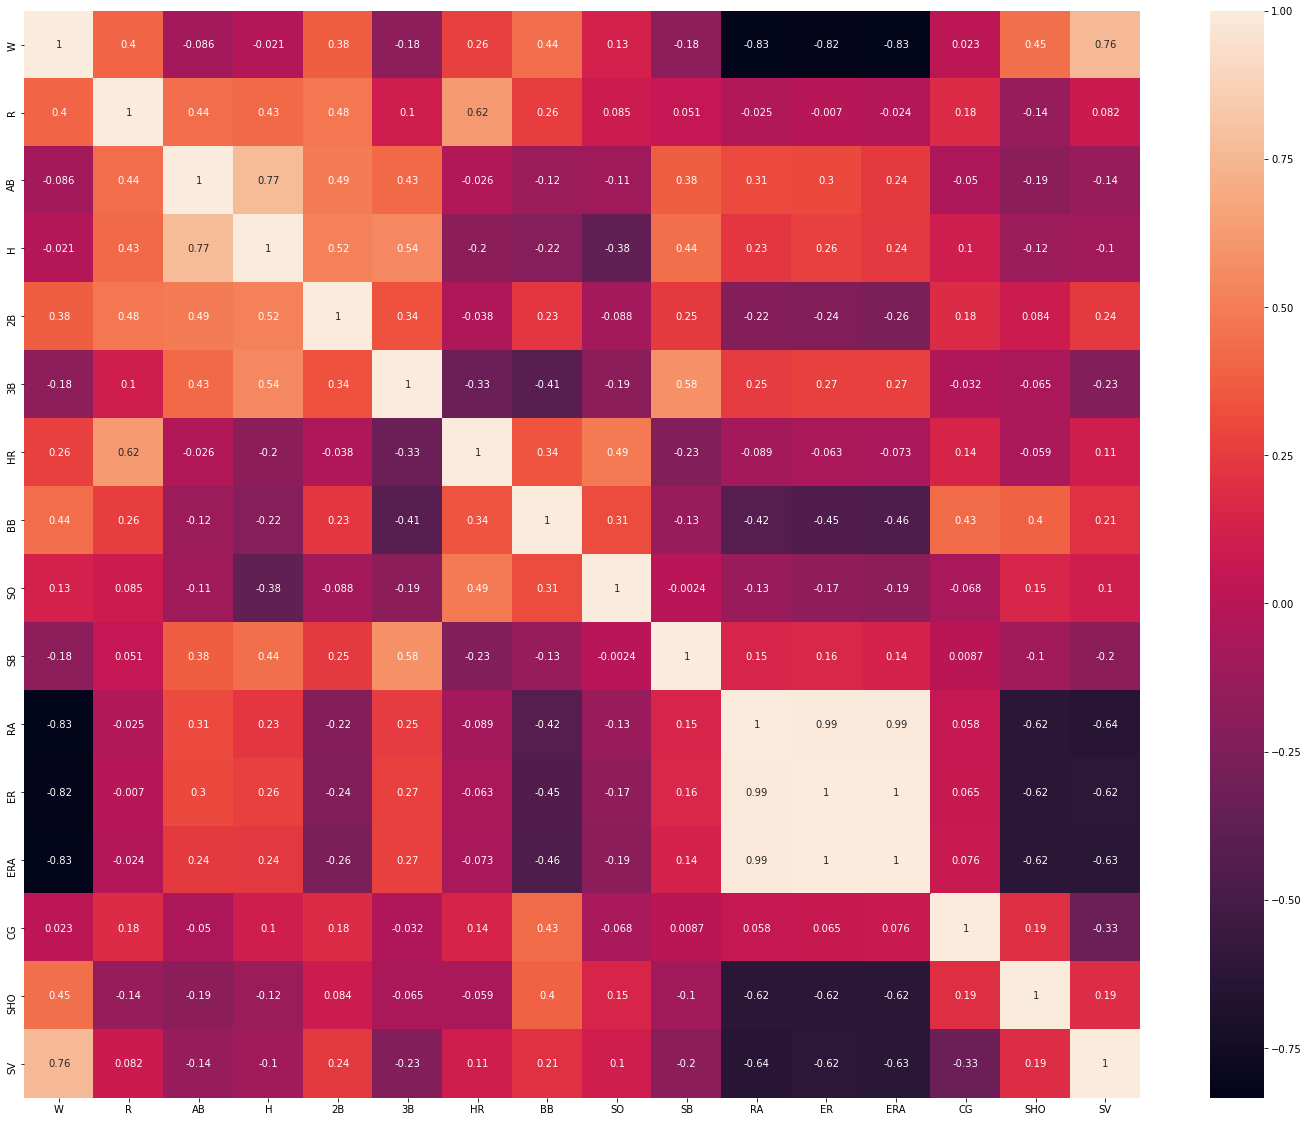

In [60]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
# lets plot heatmap
baseball_corr=baseball_1.corr()
plt.figure(figsize=(25,20))
sns.heatmap(baseball_corr,annot=True)
plt.plot()

Heatmap is used to find correlation between independant variable and Target variable, value 1 indicate correlation of label verses label,

In [61]:
corr_matrix=baseball_corr.corr()   # here we get values of correlation in descending order
corr_matrix['W'].sort_values(ascending=False)

W      1.000000
SV     0.938682
SHO    0.805885
BB     0.785425
2B     0.551122
HR     0.427489
R      0.423255
SO     0.401596
CG    -0.011647
H     -0.334120
AB    -0.399058
SB    -0.445680
3B    -0.520058
ER    -0.972422
ERA   -0.974227
RA    -0.975705
Name: W, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable,

In [62]:
baseball_1.skew()

W      0.119013
R     -0.388698
AB     0.148157
H      0.738423
2B    -0.468491
3B    -0.520896
HR    -0.100334
BB    -0.061686
SO    -0.630142
SB    -0.133393
RA    -0.261173
ER    -0.311877
ERA   -0.327981
CG     0.107290
SHO   -0.718237
SV     0.096777
dtype: float64

Skewness range is +0.5 to -0.5 any thing in between is permissible and outside this range is high skewness , feature'E',"SHO",'SO','H' feature shows skewssness

In [63]:
x=baseball_1.drop(columns=['W','SO','SHO'],axis=1)
y=baseball_1['W']

here we drop 'SH','SHO' due high skewness, and 'W' is our label

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

Standard scaler removes the mean and scales each features to unit variance ,we got all transformed values,generally it is useful for those feature which has normal distribution

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [66]:
# finding best random state
from sklearn.tree import DecisionTreeRegressor
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=r2_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.7593360995850622 on Random state 153


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=MaxRs)

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In train test split we pass x scaled and y output, test size is 25% and random state is MaxRs which is generated by above code

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from  sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

now we want to build total six regression model

In [69]:
# model instantiating and training
Li_reg=LinearRegression()  # assign linear regression as Li_reg
Li_reg.fit(x_train,y_train) # fit train feature and label to linear regression
# find r2 score for trained model
Li_reg.score(x_train,y_train)  # find r2 score for train data
# lets check,how model fits to test data
Li_reg.score(x_test,y_test)
pred1=Li_reg.predict(x_test)  # now we predict label by passing test feature
Linear_regression_score=r2_score(y_test,pred1) # we get r2 score by passing predicted label and actual label
Linear_regression_score

0.8742246104700626

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,pred1)

3.334987128890959

mean absolute error -it represent average error

In [71]:
mean_squared_error(y_test,pred1)

15.155934438357455

In [72]:
Li_reg.score(x_train,y_train)

0.9752508067116621

In [73]:
Li_reg.score(x_test,y_test)

0.8742246104700626

It is similar to MAE but noise is largerand large error are punished.it is harder to interpret than MAE as it is not in base units

In [74]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred2=KNR.predict(x_test)
KNR__score=r2_score(y_test,pred2)
KNR__score

0.5668049792531118

KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [75]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred3=DTR.predict(x_test)
DTR__score=r2_score(y_test,pred3)
DTR__score

0.6275933609958506

Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [76]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred4=RFR.predict(x_test)
RFR__score=r2_score(y_test,pred4)
RFR__score

0.7214192946058093

It is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [77]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred5=ABR.predict(x_test)
ABR__score=r2_score(y_test,pred5)
ABR__score

0.6117358229598896

Adaboost regressor is meta estimator that begin by fitting a regressor on original dataset, and then fits additional copies of regressor on same dataset but where the weights of instance are adjusted

In [78]:
svr=SVR()
svr.fit(x_train,y_train)
pred6=svr.predict(x_test)
SVR__score=r2_score(y_test,pred6)
SVR__score

0.061813148699439324

SVR is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [79]:
from sklearn.model_selection import KFold,cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [80]:
Linear_regression_cv_score=cross_val_score(Li_reg,x_scaled,y,cv=5,scoring='r2').mean() # we pass Linear regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Linear_regression_cv_score

0.5890313873447919

In [81]:
KNR_CV_score=cross_val_score(KNR,x_scaled,y,cv=5,scoring='r2').mean() # we pass KNR model,feature,target and cv=5 means 4 set for training and 1 for testing
KNR_CV_score

0.30429155344957415

In [82]:
DTR_CV_score=cross_val_score(DTR,x_scaled,y,cv=5,scoring='r2').mean() # we pass model Decision Tree Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
DTR_CV_score

-1.9872776460833408

In [83]:
RFR_CV_score=cross_val_score(RFR,x_scaled,y,cv=5,scoring='r2').mean() # we pass model Random Forest Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
RFR_CV_score

-0.5558962374086617

In [84]:
ABR_CV_score=cross_val_score(ABR,x_scaled,y,cv=5,scoring='r2').mean() # we pass model Ada boost Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
ABR_CV_score

-0.47163857197037207

In [85]:
SVR_CV_score=cross_val_score(svr,x_scaled,y,cv=5,scoring='r2').mean() # we pass model Support Vector Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
SVR_CV_score

-0.2271877435358543

In [86]:
Linear_regression_diff=Linear_regression_score*100-Linear_regression_cv_score*100
print('Linear_regression_diff',Linear_regression_diff)
KNR_diff=KNR__score*100-KNR_CV_score*100
print('KNR_diff',KNR_diff)
DTR_diff=DTR__score*100-DTR_CV_score*100
print("DTR_diff",DTR_diff)
RFR_diff=RFR__score*100-RFR_CV_score*100
print("RFR_diff",RFR_diff)
ABR_diff=ABR__score*100-ABR_CV_score*100
print("ABR_diff",ABR_diff)
SVR_diff=SVR__score*100-SVR_CV_score*100
print("SVR_diff",SVR_diff)

Linear_regression_diff 28.51932231252708
KNR_diff 26.251342580353764
DTR_diff 261.4871007079191
RFR_diff 127.7315532014471
ABR_diff 108.33743949302617
SVR_diff 28.900089223529363


In above line, we take difference of r2 score of each model with cross vaidation score of that model, we multiply the differnce by 100 to get percentage values

In [87]:
print("Linear_regression_score",Linear_regression_score)
print("Linear_regression_cv_score", Linear_regression_cv_score)
print("Linear_regression_diff", Linear_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("KNR__score",KNR__score)
print("KNR_CV_score",KNR_CV_score)
print("KNR_diff",KNR_diff)
print("-------------------------------------------------------------------------------------------")
print("DTR__score",DTR__score)
print("DTR_CV_score", DTR_CV_score)
print("DTR_diff",DTR_diff)

print("-------------------------------------------------------------------------------------------")
print("RFR__score",RFR__score)
print("RFR_CV_score",RFR_CV_score)
print("RFR_diff", RFR_diff)
print("-------------------------------------------------------------------------------------------")

print("ABR__score",ABR__score)
print("ABR_CV_score",ABR_CV_score)
print("ABR_diff",ABR_diff)
print("-------------------------------------------------------------------------------------------")
print("SVR__score",SVR__score)
print("SVR_CV_score",SVR_CV_score) 
print("SVR_diff",SVR_diff)


Linear_regression_score 0.8742246104700626
Linear_regression_cv_score 0.5890313873447919
Linear_regression_diff 28.51932231252708
-------------------------------------------------------------------------------------------
KNR__score 0.5668049792531118
KNR_CV_score 0.30429155344957415
KNR_diff 26.251342580353764
-------------------------------------------------------------------------------------------
DTR__score 0.6275933609958506
DTR_CV_score -1.9872776460833408
DTR_diff 261.4871007079191
-------------------------------------------------------------------------------------------
RFR__score 0.7214192946058093
RFR_CV_score -0.5558962374086617
RFR_diff 127.7315532014471
-------------------------------------------------------------------------------------------
ABR__score 0.6117358229598896
ABR_CV_score -0.47163857197037207
ABR_diff 108.33743949302617
-------------------------------------------------------------------------------------------
SVR__score 0.061813148699439324
SVR_CV_score -0

Here difference between  Accuracy and CV score for Linear regresion is small,so perform hyperparameter tuning for Linear regression

In [88]:
from sklearn.linear_model import Lasso,LassoCV

Lasso regularization will retun best alpha after max iterarion, alpha is learning rate

In [89]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [90]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

0.011089257939944773

now we have best parameter, lets use lasso regression and see how well our data fits

In [91]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.011089257939944773)

In [92]:
lasso_reg.score(x_test,y_test)

0.8879368519984774

We get same score for linear regression and Lasso regression,

In [93]:
import joblib
joblib.dump(Li_reg,"Baseball.pkl")

['Baseball.pkl']

Here we saved our model Sucessfully